In [109]:
# READ THESE COMMENTS:

# this script sorts raw concentrations collected as part of the GBRCLMP
# GBRCLMP measuremets less than LoD were HALVED in the corresponding input excel files (NOT done within the script)
# this script sorts raw concentrations collected as part of the PSDB-SWDB programs (P2R concnetrations are included in either PSDB/SWDB)
# PSDB and SWDB measuremets less than LoD is halved during the sorting process (using entries in 'FLAG' column)
# this script combines raw concnetrations of GBERCLMP and PSDB-SWDB using daily time/date stamp and take mean if there are multiple measuremets for a day 
# this script also collates pollutant loads estimated as part of GBRCLMP and P2R programs
# this script sort raw flow measuremets recorded at a number of DNRM gauges and MultiFarm gauge  
# this script plots annual loads as bar plots, flow and concentration plots as time-ersies   

In [110]:
import datetime as dt
import matplotlib.dates as mdates
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## sorting GBRCLMP raw concentrations

In [111]:
GBRCLMP_rawConcentration_dir = 'H:/dataMW/data/20160317_DARTS/rawConcentrations/modifiedForPlotting/'
fil_prefix = 'GBRCLMP_rawConcentrations_'
fil_suffix = '_lessthanLODhalved'

In [112]:
GBRCLMP_stations = ['124003A',    #AndromacheRvJochheims',
            '124001B',    #OConnellRvStaffordsCrossing',
            '1240062',    #OConnellRvCaravanPark,
            '125004B',    #CattleCkGargett',
            '125005A',    #BlacksCkWhitefords',
            '125013A',    #PioneerRvDumbletonPumpStation',
            '126001A',    #SandyCkHomebush'
             1260092,     #MultiFarm        
           ]

GBRCLMP_fils = ['AndromacheRvJochheims',
                  'OConnellRvStaffordsCrossing',
                  'OConnellRvCaravanPark',
                  'CattleCkGargett',
                  'BlacksCkWhitefords',
                  'PioneerRvDumbletonPumpStation',
                  'SandyCkHomebush',
                  'MultiFarm',
                 ]

In [113]:
GBRCLMP_Concentrations = {station: pd.DataFrame() for station in GBRCLMP_stations}

for station in GBRCLMP_stations:
    
    #print(station)
    rawConc_fil = GBRCLMP_rawConcentration_dir + fil_prefix + GBRCLMP_fils[GBRCLMP_stations.index(station)] + fil_suffix + '.xlsx'
    rawConc = pd.read_excel(rawConc_fil,header=0)
    #rawConc.head()
    
    rawConc_req = pd.DataFrame(rawConc[['Station',
                                        'Sample Date(dd/MM/yyyy)',
                                        'Sample Time(HHmm)',
                                        'Total Suspended Solids((2172.20)  mg/L)',
                                        'Total Nitrogen - suspended as N((2330.20)  mg/L)',
                                        'Kjeldahl Nitrogen((2336.20)  mg/L)',
                                        'Total Nitrogen as N((2337.20)  mg/L)',
                                        'Oxidised Nitrogen as N((2343.20)  mg/L)',
                                        'Ammonium Nitrogen as N((2345.20)  mg/L)',
                                        'Kjeldahl Nitrogen - dissolved((2350.20) mg/L)',
                                        'Total Dissolved Nitrogen as N((2355.20)  mg/L)',
                                        'Organic Nitrogen - dissolved as N((2356.20)  mg/L)',
                                        'Total Phosphorus as P((2360.20)  mg/L)',
                                        'Dissolved Inorganic Phosphorus((2365.20)  mg/L)',
                                        'Total Phosphorus- dissolved as P((2368.20)  mg/L)',
                                        'Organic Phosphorus - dissolved as P((2370.20)  mg/L)',
                                        'Total Phosphorus -suspended as P((2375.20)  mg/L)',
                                        'Ametryn',
                                        'Atrazine',
                                        'Diuron',
                                        'Hexazinone',
                                        'Tebuthiuron'                      
                                       ]])   
    
    rawConc_req.columns = ['Station','Date','Time','Sediment','PN','TKN','TN','NOx','NH4','DTKN',
                           'DTN','DON','TP','DIP','DTP','DOP','PP',
                           'Ametryn','Atrazine','Diuron','Hexazinone','Tebuthiuron']
    
    #### calculate DIN = NOx + NH4
    rawConc_req['DIN'] = rawConc_req['NOx'] + rawConc_req['NH4']
    
    #### 
    GBRCLMP_site = pd.DataFrame(rawConc_req[['Date',
                   'Sediment',
                   'PN',
                   'DIN',
                   'DON',
                   'TN',
                   'PP',
                   'DIP',
                   'DOP',
                   'TP',
                   'Ametryn',
                   'Atrazine',
                   'Diuron',
                   'Hexazinone',
                   'Tebuthiuron' 
                   ]])  
    
    GBRCLMP_site = GBRCLMP_site.set_index(['Date'])
    GBRCLMP_site.index.name = None

    GBRCLMP_Concentrations[station] = GBRCLMP_site
        

In [114]:
#GBRCLMP_Concentrations

In [115]:
GBRCLMP_Concentrations['125013A'].head()

,Sediment,PN,DIN,DON,TN,PP,DIP,DOP,TP,Ametryn,Atrazine,Diuron,Hexazinone,Tebuthiuron
2006-01-23,5,0.12,0.0080,0.316,0.444,0.005,0.001,0.059,0.06,NaN,NaN,NaN,NaN,NaN
2006-02-16,2,0.17,0.0015,0.209,0.381,0.005,0.005,0.035,0.04,NaN,NaN,NaN,NaN,NaN
2006-02-17,5,0.14,0.0310,0.200,0.371,0.005,0.054,0.066,0.33,NaN,NaN,NaN,NaN,NaN
2006-04-27,7,0.09,0.1530,0.459,0.702,0.050,0.052,0.005,0.11,NaN,NaN,NaN,NaN,NaN
2006-05-15,4,0.15,0.1270,0.315,0.592,0.020,0.025,0.015,0.06,NaN,NaN,NaN,NaN,NaN


In [116]:
GBRCLMP_Concentrations['125013A'].to_csv('daily_GBRCLMP_125013A.csv')

## sorting PSDB-SWDB raw concentrations

In [117]:
PSDB_SWDB_rawfile = 'H:/dataMW/data/20160121_dataAnalysis/wq/psdb_swdb/RESULTS_and_SAMPLES_PSDB_SWDB_Proserpine_OConnell_Pioneer_Plane_rb.xlsx'

In [118]:
rawConc_PSDB_SWDB = pd.read_excel(PSDB_SWDB_rawfile)   
#rawConc_PSDB_SWDB

In [119]:
LoD_index = rawConc_PSDB_SWDB.index[rawConc_PSDB_SWDB['FLAG']=='<']    ####identifying measurements below LoD
LoD_index

rawConc_PSDB_SWDB['VALUE'][LoD_index] = rawConc_PSDB_SWDB['VALUE'][LoD_index]*0.5   ####halving measurements below LoD
PSDB_SWDB_daily = rawConc_PSDB_SWDB
#PSDB_SWDB_daily

C:\Users\BaheerathanR\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [120]:
#PSDB_SWDB_daily_2006_2014 = PSDB_SWDB_daily[PSDB_SWDB_daily['Date']>='2006-01-01']
#PSDB_SWDB_daily_2006_2014 = PSDB_SWDB_daily_2006_2014[PSDB_SWDB_daily_2006_2014['Date']<'2014-12-31']
#PSDB_SWDB_daily_2006_2014.head()

PSDB_SWDB_daily_all = PSDB_SWDB_daily


In [121]:
PSDB_SWDB_stations = ['124003A',    #AndromacheRvJochheims',
            '124001B',    #OConnellRvStaffordsCrossing',
             1240062,      #OConnellRvCaravanPark,
            '125004B',    #CattleCkGargett',
            '125005A',    #BlacksCkWhitefords',
            '125013A',    #PioneerRvDumbletonPumpStation',
            '126001A',    #SandyCkHomebush'
             1260092,     #MultiFarm         
           ]
#OConnellRvCaravanPark'   NO PSDB-SWDB station at O'Connell River at Caravan Park.  GBRCLMP is the ONLY data.  

PSDB_SWDB_Concentrations = {station: pd.DataFrame() for station in PSDB_SWDB_stations}
#PSDB_SWDB_Concentrations    

In [122]:
for station in PSDB_SWDB_stations:
    
    PSDB_SWDB_daily_2006_2014_station = PSDB_SWDB_daily_all[PSDB_SWDB_daily_all['STATION']==station]
       
    PSDB_SWDB_daily_2006_2014_station_paras = PSDB_SWDB_daily_2006_2014_station[
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 2172) |   #Total Suspended Solids
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 2345) |   #Ammonia as N - soluble (Field filtered)
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 2343) |   #Nitrate+nitrite as N soluble (FieldFilt)
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 2356) |   #Organic Nitrogen - dissolved
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 2330) |   #Total Nitrogen - suspended
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 2337) |   #Total Nitrogen
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 2365) |   #Total React P (Ortho P) - soluble (FldF)
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 2370) |   #Organic Phospherous - dissolved
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 2375) |   #Total Phospherous - suspended
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 2363) |   #Total Phosphorus as P
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 4018) |   #Ametryn
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 4024) |   #Atrazine
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 4222) |   #Diuron
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 4642) |   #Hexazinone
             (PSDB_SWDB_daily_2006_2014_station['VARIABLE']== 4019)     #Tebuthiuron
            ]  
     
    group = PSDB_SWDB_daily_2006_2014_station_paras.groupby(['Date','SHORTNAME']).mean()    
    data_filter = group.reset_index().pivot('Date','SHORTNAME','VALUE') 
    
    data_filter.columns = ['Ametryn','NH4','Atrazine','Diuron','Hexazinone','NOx','DON','DOP','Tebuthiuron','TN','PN','PP','TP','DIP','Sediment']
    data_filter.index.name = None
    data_filter['DIN'] = data_filter['NOx'] + data_filter['NH4']
    #data_filter['DON'] = NaN
    #data_filter['DOP'] = NaN
    
    PSDB_SWDB_site = pd.DataFrame(data_filter[['Sediment',
                   'PN',
                   'DIN',
                   'DON',                            
                   'TN',
                   'PP',
                   'DIP',
                   'DOP',                            
                   'TP',
                   'Ametryn',
                   'Atrazine',
                   'Diuron',
                   'Hexazinone',
                   'Tebuthiuron',            
                   ]])  

    PSDB_SWDB_Concentrations[station] = PSDB_SWDB_site
        

    

In [123]:
#PSDB_SWDB_Concentrations

In [124]:
PSDB_SWDB_Concentrations['125013A'].head() 

,Sediment,PN,DIN,DON,TN,PP,DIP,DOP,TP,Ametryn,Atrazine,Diuron,Hexazinone,Tebuthiuron
1980-02-15,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1994-06-03,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-07-26,NaN,NaN,0.009,NaN,NaN,NaN,0.002,NaN,0.015,NaN,NaN,NaN,NaN,NaN
1994-09-28,NaN,NaN,0.024,NaN,NaN,NaN,0.002,NaN,0.027,NaN,NaN,NaN,NaN,NaN
1994-11-02,NaN,NaN,0.006,NaN,NaN,NaN,0.008,NaN,0.046,NaN,NaN,NaN,NaN,NaN


In [125]:
PSDB_SWDB_Concentrations['125013A'].to_csv('daily_PSDB-SWDB_125013A.csv')

## combine GBRCLMP and PSDB-SWDB together


In [126]:
Mackay_stations = ['AndromacheRvJochheims',
            'OConnellRvStaffordsCrossing',
            'OConnellRvCaravanPark',
            'CattleCkGargett',
            'BlacksCkWhitefords',
            'PioneerRvDumbletonPumpStation',
            'SandyCkHomebush',
            'MultiFarm',       
           ]

GBRCLMP_stations = ['124003A',    #AndromacheRvJochheims',
            '124001B',    #OConnellRvStaffordsCrossing',
            '1240062',    #OConnellRvCaravanPark,
            '125004B',    #CattleCkGargett',
            '125005A',    #BlacksCkWhitefords',
            '125013A',    #PioneerRvDumbletonPumpStation',
            '126001A',    #SandyCkHomebush'
             1260092,     #MultiFarm'
           ]

PSDB_SWDB_stations = ['124003A',    #AndromacheRvJochheims',
            '124001B',    #OConnellRvStaffordsCrossing',
             1240062,    #OConnellRvCaravanPark,
            '125004B',    #CattleCkGargett',
            '125005A',    #BlacksCkWhitefords',
            '125013A',    #PioneerRvDumbletonPumpStation',
            '126001A',    #SandyCkHomebush'
             1260092,     #MultiFarm'
           ]

Mackay_Concentrations = {station: pd.DataFrame() for station in Mackay_stations}
#Mackay_Concentrations

In [127]:
for station in Mackay_stations:
    
    GBRCLMP_Concentrations_station = GBRCLMP_Concentrations[GBRCLMP_stations[Mackay_stations.index(station)]]
    PSDB_SWDB_Concentrations_station = PSDB_SWDB_Concentrations[PSDB_SWDB_stations[Mackay_stations.index(station)]]
    
    Combine_Concentrations_station = pd.concat([GBRCLMP_Concentrations_station,PSDB_SWDB_Concentrations_station])
    #Combine_Concentrations_station = GBRCLMP_Concentrations_station #PSDB_SWDB_Concentrations_station
    Combine_Concentrations_station = Combine_Concentrations_station.reset_index()
    Combine_Concentrations_station = Combine_Concentrations_station.groupby(['index']).mean()
    Combine_Concentrations_station.index.name = None
    
    Combine_Concentrations_station['Total Toxic Load'] = Combine_Concentrations_station['Ametryn']*0.65 + Combine_Concentrations_station['Atrazine']*0.036 + Combine_Concentrations_station['Diuron']*1 + Combine_Concentrations_station['Hexazinone']*0.21 #+ Combine_Concentrations_station['Tebuthiuron']*0.019   
          
    Mackay_Concentrations[station] = Combine_Concentrations_station      
    

In [128]:
#Mackay_Concentrations

In [129]:
Mackay_Concentrations['PioneerRvDumbletonPumpStation'].head()

,Sediment,PN,DIN,DON,TN,PP,DIP,DOP,TP,Ametryn,Atrazine,Diuron,Hexazinone,Tebuthiuron,Total Toxic Load
1980-02-05,0,0,0.000,0,0,0,0.000,0,0.000,0,0,0,0,0,0
1980-02-15,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-06-03,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-07-26,NaN,NaN,0.009,NaN,NaN,NaN,0.002,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN
1994-09-28,NaN,NaN,0.024,NaN,NaN,NaN,0.002,NaN,0.027,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
Mackay_Concentrations['PioneerRvDumbletonPumpStation'].to_csv('daily_all_PioneerRvDumbletonPumpStation.csv')

## read and sort DNRM gauged data for raw flow measurements 

In [131]:
gaugesDNRM_dir = 'H:/dataMW/data/20160119_dnrmSitesData/forModelComparison/'

In [132]:
gaugesDNRM = ['AndromacheRvJochheims',
                  'OConnellRvStaffordsCrossing',
                  'OConnellRvCaravanPark',
                  'CattleCkGargett',
                  'BlacksCkWhitefords',
                  'PioneerRvDumbletonWeirTW',
                  'SandyCkHomebush',
                  'MultiFarm',
                 ]

In [133]:
qualityDNRMGaugeData = {gauge: pd.DataFrame() for gauge in gaugesDNRM}

for gauge in gaugesDNRM:

    gaugeDNRM_fil = gaugesDNRM_dir + gauge + '.xlsx'
    gaugeDNRM_rawData = pd.read_excel(gaugeDNRM_fil,header=0)
    #gaugeDNRM_rawData.head()
    
    rawDate = gaugeDNRM_rawData['Date']
    rawData = gaugeDNRM_rawData['Discharge_MLday_Mean']
    rawData_qc = gaugeDNRM_rawData['Discharge_Mlday_Qual']
    
    #### selecting good quality data with the QCs 1- Good (actual), 9 - CITEC - Normal Reading, 10 - Good, 20 - Fair, 30 - Poor, 60 - Estimate 
    date_QCed = rawDate[(rawData_qc==1)|(rawData_qc==9)|(rawData_qc==10)|(rawData_qc==20)|(rawData_qc==30)|(rawData_qc==60)]
    data_QCed = rawData[(rawData_qc==1)|(rawData_qc==9)|(rawData_qc==10)|(rawData_qc==20)|(rawData_qc==30)|(rawData_qc==60)]
    
    d_QCed = pd.concat([date_QCed,data_QCed],axis=1)
    d_QCed = d_QCed.set_index(['Date'])
    d_QCed.index.name = None
    d_QCed.columns = ['Measured Flow']
    #d_QCed.head()
    
    qualityDNRMGaugeData[gauge] = d_QCed

In [134]:
#qualityDNRMGaugeData

In [135]:
qualityDNRMGaugeData['PioneerRvDumbletonWeirTW'].head()

,Measured Flow
2005-12-23,0
2005-12-24,0
2005-12-25,0
2005-12-26,0
2005-12-27,0


In [136]:
qualityDNRMGaugeData['PioneerRvDumbletonWeirTW'].to_csv('daily_flow_PioneerRvDumbletonWeirTW.csv')

## collate annual loads of GBRCLMP & P2R programs

In [137]:
### load estimates directory, file, parameters, and sites 

### XL contains the annual load estimates 
measuredAnnualLoadfile = 'H:/dataMW/data/20160317_DARTS/summaryLoadsObserved_GOOD_EXCELLENT_withPSIIs.xlsx'

### require re-defining a list of parameters of interest because Python error while reading the 'gaps' and '-'
measuredAnnualLoadParas = ['Flow','Sediment','PN','DIN',
                   'DON','TN','PP',
                   'DIP','DOP','TP',
                   'Ametryn','Atrazine','Diuron','Hexazinone',
                   'Tebuthiuron'           
                  ]  

#### require re-defining a list of sites of interest because Python error while reading the 'gaps' and '-' 
measuredAnnualLoadSites = ['AndromacheRvJochheims',
                  'OConnellRvStaffordsCrossing',
                  'OConnellRvCaravanPark',
                  'CattleCkGargett',
                  'BlacksCkWhitefords',
                  'PioneerRvDumbletonPumpStation',
                  'SandyCkHomebush',
                  'MultiFarm',
                  'MultiFarm_highFlowExclude',
                 ]


In [138]:
measuredAnnualLoads = {site: pd.DataFrame() for site in measuredAnnualLoadSites}
#measured_annual

for site in measuredAnnualLoadSites:
    columns = ['RepresentivityRating','Flow','Sediment','TN','PN','NOx','NH4','DIN','DON','TP','PP','DIP','DOP','Ametryn','Atrazine','Diuron','Hexazinone','Tebuthiuron']
    index = ['2006-2007','2007-2008','2008-2009','2009-2010','2010-2011','2011-2012','2012-2013','2013-2014']
     
    #sitename = loadSites[loadSites.index(site)] 

    annual_temp = pd.read_excel(measuredAnnualLoadfile,sheetname=site,header=0)
    annual_temp['Total Toxic Load'] = annual_temp['Ametryn']*0.65 + annual_temp['Atrazine']*0.036 + annual_temp['Diuron']*1 + annual_temp['Hexazinone']*0.21 #+ modelledDaily['Tebuthiuron']*0.019   
        
    
    measuredAnnualLoads[site] = pd.DataFrame(annual_temp,index=index)
    measuredAnnualLoads

In [139]:
#measuredAnnualLoads

In [140]:
measuredAnnualLoads['PioneerRvDumbletonPumpStation']

,RepresentivityRating,Flow,Sediment,TN,PN,NOX,NH4,DIN,DON,TP,PP,DIP,DOP,Ametryn,Atrazine,Diuron,Hexazinone,Tebuthiuron,Total Toxic Load
2006-2007,Good,884963,126954,851,348,160,46,206,291,161,123,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-2008,Excellent,1364326,252492,1357,777,138,36,174,405,314,250,62,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2008-2009,Good,927461,155739,1013,610,98,17,115,289,227,179,44,12.0,NaN,NaN,NaN,NaN,NaN,NaN
2009-2010,Good,1326065,373818,1929,962,420,57,477,372,488,267,84,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-2011,Excellent,3372934,819023,4098,2748,548,95,643,711,1013,816,109,100.0,74.0,530,520,130,NaN,614.480
2011-2012,Excellent,1216712,210830,1295,822,195,31,226,245,302,245,37,27.0,8.7,220,140,27,0.9,159.245
2012-2013,Excellent,1247976,131796,1046,507,210,43,253,288,206,157,45,13.0,28.0,460,440,93,NaN,494.290
2013-2014,Excellent,581628,35372,635,205,228,29,258,174,86,54,25,8.9,5.7,230,260,43,NaN,281.015


In [141]:
measuredAnnualLoads['PioneerRvDumbletonPumpStation'].to_csv('measured_annual_loads_PioneerRvDumbletonPumpStation.csv')

## RUN below here when comparing latest model results

### sorting modelled results for daily and annulas 

In [142]:
### model directory, file, parameters, and sites 

modelsOfInterest = ['MW_BASE_RC6',
                    'MW_BASE_RC7',
                  ]

modelDirs = ['H:/modelMW/modelRuns/latestHydrologyParameters/RC7/' + modelsOfInterest[0] + '/',
             'H:/modelMW/modelRuns/latestHydrologyParameters/RC7/' + modelsOfInterest[1] + '/',
            ]
            
modelDirSuffix = 'MW_DS_2015/MW_baseline_3818_UpdateHydro/TimeSeries/'

### modelled parameters of interest
modelledParas = ['Flow',
                  'Sediment - Fine',
                  'N_Particulate',
                  'N_DIN',
                  'N_DON',
                  'P_Particulate',
                  'P_FRP',
                  'P_DOP',
                  'Ametryn',
                  'Atrazine',
                  'Diuron',
                  'Hexazinone',
                 ]   #'Tebuthiuron', #not included in the modelz

#### define the following suffixes to read model results as CSVs
modelledParaSuffixes = ['_cubicmetrespersecond',
                '_kilograms',
               ]

### modelled sites of interest
modelledSites = ['_gauge_124003A_AndromacheRvJochheims',
                  '_gauge_124001B_OConnellRvStaffordsCrossing',
                  '_Outlet Node12',
                  '_extraction_CattleCkGargett_125004A',
                  '_gauge_125005A_BlacksCkWhitefords',
                  '_gauge_125013A_PioneerRvDumbletonPumpStation',
                  '_gauge_126001A_SandyCkHomebush',
                  '_gauge_1260092_MultiFarm',
                 ]

#### corresponding sites names of the gauge names  - to make both measuremets and model locations consistent
measurementSites = ['AndromacheRvJochheims',
                  'OConnellRvStaffordsCrossing',
                  'OConnellRvCaravanPark',
                  'CattleCkGargett',
                  'BlacksCkWhitefords',
                  'PioneerRvDumbletonPumpStation',
                  'SandyCkHomebush',
                  'MultiFarm',
                 ]

In [143]:
modelledDailyModels = {model: pd.DataFrame() for model in modelsOfInterest}
modelledAnnualModels = {model: pd.DataFrame() for model in modelsOfInterest}

for model in modelsOfInterest:
    
    modelDir = modelDirs[modelsOfInterest.index(model)]
    
    modelledDailySites = {site: pd.DataFrame() for site in measurementSites}
    modelledAnnualSites = {site: pd.DataFrame() for site in measurementSites}
    
    for site in modelledSites:
        #print(site)
        
        # create file paths for the corresponding parameter CSVs
        Flow_fil = modelDir + modelDirSuffix + modelledParas[0] + 's' +  '/' + modelledParas[0] + site + modelledParaSuffixes[0] + '.csv'
        Sediment_fil = modelDir + modelDirSuffix + modelledParas[1] +  '/' + modelledParas[1] + site + modelledParaSuffixes[1] + '.csv'
        PN_fil = modelDir + modelDirSuffix + modelledParas[2] +  '/' + modelledParas[2] + site + modelledParaSuffixes[1] + '.csv'
        DIN_fil = modelDir + modelDirSuffix + modelledParas[3] +  '/' + modelledParas[3] + site + modelledParaSuffixes[1] + '.csv'
        DON_fil = modelDir + modelDirSuffix + modelledParas[4] +  '/' + modelledParas[4] + site + modelledParaSuffixes[1] + '.csv'
        PP_fil = modelDir + modelDirSuffix + modelledParas[5] +  '/' + modelledParas[5] + site + modelledParaSuffixes[1] + '.csv'
        DIP_fil = modelDir + modelDirSuffix + modelledParas[6] +  '/' + modelledParas[6] + site + modelledParaSuffixes[1] + '.csv'
        DOP_fil = modelDir + modelDirSuffix + modelledParas[7] +  '/' + modelledParas[7] + site + modelledParaSuffixes[1] + '.csv'
        Ametryn_fil = modelDir + modelDirSuffix + modelledParas[8] +  '/' + modelledParas[8] + site + modelledParaSuffixes[1] + '.csv'
        Atrazine_fil = modelDir + modelDirSuffix + modelledParas[9] +  '/' + modelledParas[9] + site + modelledParaSuffixes[1] + '.csv'
        Diuron_fil = modelDir + modelDirSuffix + modelledParas[10] +  '/' + modelledParas[10] + site + modelledParaSuffixes[1] + '.csv'
        Hexazinone_fil = modelDir + modelDirSuffix + modelledParas[11] +  '/' + modelledParas[11] + site + modelledParaSuffixes[1] + '.csv'
        #Tebuthiuron_fil = modelDir + modelDirSuffix + modelledParas[12] +  '/' + modelledParas[12] + site + modelledParaSuffixes[1] + '.csv'
        
        #read CSVs of each parameter
        Flow = pd.read_csv(Flow_fil,header=0)
        Sediment = pd.read_csv(Sediment_fil,header=0)
        PN = pd.read_csv(PN_fil,header=0)
        DIN = pd.read_csv(DIN_fil,header=0)
        DON = pd.read_csv(DON_fil,header=0)
        PP = pd.read_csv(PP_fil,header=0)
        DIP = pd.read_csv(DIP_fil,header=0)
        DOP = pd.read_csv(DOP_fil,header=0)
        Ametryn = pd.read_csv(Ametryn_fil,header=0)
        Atrazine = pd.read_csv(Atrazine_fil,header=0)
        Diuron = pd.read_csv(Diuron_fil,header=0)
        Hexazinone = pd.read_csv(Hexazinone_fil,header=0)
        #Tebuthiuron = pd.read_csv(Tebuthiuron_fil,header=0)
        
        #assign Variable for each paramter
        Date = array(Flow['Date'])
        Flow = array(Flow[Flow.columns[1]])
        Sediment = array(Sediment[Sediment.columns[1]])
        PN = array(PN[PN.columns[1]])
        DIN = array(DIN[DIN.columns[1]])
        DON = array(DON[DON.columns[1]])
        PP = array(PP[PP.columns[1]])
        DIP = array(DIP[DIP.columns[1]])
        DOP = array(DOP[DOP.columns[1]])
        Ametryn = array(Ametryn[Ametryn.columns[1]])
        Atrazine = array(Atrazine[Atrazine.columns[1]])
        Diuron = array(Diuron[Diuron.columns[1]])
        Hexazinone = array(Hexazinone[Hexazinone.columns[1]])
        #Tebuthiuron = array(Tebuthiuron[Tebuthiuron.columns[1]])
        
        #convert Units as required
        Flow = Flow*86.4              #m3/sec into ML/day conversion
        Sediment = Sediment/1000      #kg/day into tonnes/day conversion
        PN = PN/1000
        DIN = DIN/1000
        DON = DON/1000
        PP = PP/1000
        DIP = DIP/1000
        DOP = DOP/1000
        Ametryn = Ametryn             #keep kg/day 
        Atrazine = Atrazine
        Diuron = Diuron
        Hexazinone = Hexazinone
        #Tebuthiuron = Tebuthiuron/1000
        
        #combine All daily paramters together 
        modelledDaily = array([Date,Flow,Sediment,PN,DIN,DON,PP,DIP,DOP,Ametryn,Atrazine,Diuron,Hexazinone])  #,Tebuthiuron
        modelledDaily = pd.DataFrame(modelledDaily).T
        modelledDaily.columns = ['Date','Flow','Sediment','PN','DIN','DON','PP','DIP','DOP','Ametryn','Atrazine','Diuron','Hexazinone'] #,'Tebuthiuron'
        modelledDaily = modelledDaily.set_index(['Date'])
        modelledDaily.index.name = None
        
        modelledDaily['Total Toxic Load'] = modelledDaily['Ametryn']*0.65 + modelledDaily['Atrazine']*0.036 + modelledDaily['Diuron']*1 + modelledDaily['Hexazinone']*0.21 #+ modelledDaily['Tebuthiuron']*0.019   
                
        ###estimate annual loads
        #modelledDaily_2006_2007 = modelledDaily[modelledDaily.index>='2006-07-01']
        #modelledDaily_2006_2007 = modelledDaily_2006_2007[modelledDaily_2006_2007.index<'2007-07-01']
        
        if site == '_gauge_1260092_MultiFarm':  #removing high flow events from annual estimates
            modelledDaily_2006_2007 = modelledDaily[(modelledDaily.index >='2006-07-01') & 
                                                    (modelledDaily.index < '2007-07-01')]
            modelledDaily_2007_2008 = modelledDaily[(modelledDaily.index >='2007-07-01') & 
                                                    (modelledDaily.index < '2008-07-01')]
            modelledDaily_2008_2009 = modelledDaily[(modelledDaily.index >='2008-07-01') & 
                                                    (modelledDaily.index < '2009-07-01')]
            
            modelledDaily_2009_2010 = modelledDaily[((modelledDaily.index >='2009-07-01') & (modelledDaily.index < '2010-01-30')) | 
                                                    ((modelledDaily.index >'2010-02-08') & (modelledDaily.index < '2010-02-16')) |
                                                    ((modelledDaily.index >'2010-02-21') & (modelledDaily.index < '2010-02-25')) |
                                                    ((modelledDaily.index >'2010-03-08') & (modelledDaily.index < '2010-03-20')) |
                                                    ((modelledDaily.index >'2010-04-01') & (modelledDaily.index < '2010-07-01'))]
            
            modelledDaily_2010_2011 = modelledDaily[((modelledDaily.index >='2010-07-01') & (modelledDaily.index < '2010-11-29')) |
                                                    ((modelledDaily.index >'2010-12-06') & (modelledDaily.index < '2010-12-23')) |
                                                    ((modelledDaily.index >'2011-01-02') & (modelledDaily.index < '2011-03-12')) |
                                                    ((modelledDaily.index >'2011-04-16') & (modelledDaily.index < '2011-07-01'))]

            modelledDaily_2011_2012 = modelledDaily[((modelledDaily.index >='2011-07-01') & (modelledDaily.index < '2012-03-15')) |
                                                    ((modelledDaily.index >'2012-03-30') & (modelledDaily.index < '2012-07-01'))]
            
            modelledDaily_2012_2013 = modelledDaily[((modelledDaily.index >='2012-07-01') & (modelledDaily.index < '2013-01-24')) |
                                                    ((modelledDaily.index >'2013-02-04') & (modelledDaily.index < '2013-02-23')) |
                                                    ((modelledDaily.index >'2013-03-16') & (modelledDaily.index < '2013-07-01'))]
                                                     
            modelledDaily_2013_2014 = modelledDaily[(modelledDaily.index >='2013-07-01') & 
                                                    (modelledDaily.index < '2014-07-01')]
       
        else:
            
            modelledDaily_2006_2007 = modelledDaily[(modelledDaily.index >='2006-07-01') & 
                                                    (modelledDaily.index < '2007-07-01')]
            modelledDaily_2007_2008 = modelledDaily[(modelledDaily.index >='2007-07-01') & 
                                                    (modelledDaily.index < '2008-07-01')]
            modelledDaily_2008_2009 = modelledDaily[(modelledDaily.index >='2008-07-01') & 
                                                    (modelledDaily.index < '2009-07-01')]
            modelledDaily_2009_2010 = modelledDaily[(modelledDaily.index >='2009-07-01') & 
                                                    (modelledDaily.index < '2010-07-01')]
            modelledDaily_2010_2011 = modelledDaily[(modelledDaily.index >='2010-07-01') & 
                                                    (modelledDaily.index < '2011-07-01')]
            modelledDaily_2011_2012 = modelledDaily[(modelledDaily.index >='2011-07-01') & 
                                                    (modelledDaily.index < '2012-07-01')]
            modelledDaily_2012_2013 = modelledDaily[(modelledDaily.index >='2012-07-01') & 
                                                    (modelledDaily.index < '2013-07-01')]
            modelledDaily_2013_2014 = modelledDaily[(modelledDaily.index >='2013-07-01') & 
                                                    (modelledDaily.index < '2014-07-01')]
        
        modelledAnnual = [sum(modelledDaily_2006_2007),
                            sum(modelledDaily_2007_2008),
                            sum(modelledDaily_2008_2009),
                            sum(modelledDaily_2009_2010),
                            sum(modelledDaily_2010_2011),
                            sum(modelledDaily_2011_2012),
                            sum(modelledDaily_2012_2013),
                            sum(modelledDaily_2013_2014),
                              ]
        
        index = ['2006-2007','2007-2008','2007-2008','2009-2010','2010-2011','2011-2012','2012-2013','2013-2014']

        modelledAnnual = pd.DataFrame(modelledAnnual,index=index)
        
        
        ###assign modelled daily and annuals 
        
        modelledDailySites[measurementSites[modelledSites.index(site)]] = modelledDaily
        modelledAnnualSites[measurementSites[modelledSites.index(site)]] = modelledAnnual
        #modelledDailySites
    
    modelledDailyModels[model] = modelledDailySites
    modelledAnnualModels[model] = modelledAnnualSites
    #modelledDailyModels
    

In [144]:
modelledAnnualModels['MW_BASE_RC7']['MultiFarm']

,Flow,Sediment,PN,DIN,DON,PP,DIP,DOP,Ametryn,Atrazine,Diuron,Hexazinone,Total Toxic Load
2006-2007,18654.070601,1140.330771,3.954156,31.450330,9.159815,1.455996,3.311777,0.832058,21.167740,13.928133,47.836190,7.669784,63.707288
2007-2008,32899.561469,2117.085956,6.795748,24.861105,16.613185,2.533228,6.014487,1.510966,17.347898,8.819683,66.402136,10.505993,80.202036
2007-2008,20606.811223,1429.984052,5.195413,12.545734,9.756054,1.930615,3.521095,0.884748,13.724505,8.399478,35.330489,4.616351,45.523232
2009-2010,10386.326770,655.879523,2.622240,6.365725,4.727085,0.949834,1.702667,0.427885,15.882269,12.873917,20.020105,3.290305,31.498004
2010-2011,20920.630351,976.909867,4.766805,13.593531,9.040205,1.625742,3.247269,0.816193,5.564547,4.327247,41.708566,8.930899,47.356792
2011-2012,9105.398353,720.816648,2.833065,8.174080,3.971791,1.050265,1.427408,0.358764,9.739139,8.836429,17.409012,2.749976,24.635059
2012-2013,7809.266086,366.870293,1.904363,5.604623,3.232024,0.645892,1.158159,0.291146,3.085190,2.800537,5.743638,0.793900,8.016550
2013-2014,7662.713354,579.061433,2.390710,4.124039,3.262977,0.877024,1.171126,0.294375,2.340768,1.536997,16.003662,2.324269,18.068590


## Ploting Ploting Ploting 

In [145]:
### define sites and paras and plots need to be plotted

plotSites = ['PioneerRvDumbletonPumpStation',
             'SandyCkHomebush',
             'MultiFarm',
                 ]
#'MultiFarm',

#plotParas = ['Flow', 'Sediment','PN','DIN','Total Toxic Load']
#plotParas = ['Sediment','PN', 'PP']  
#plotParas = ['DIN','DON','DIP','DOP']
#plotParas = ['TN','TP']
plotParas = ['Flow','Sediment','PN','DIN','DON','PP','DIP','DOP','Ametryn','Atrazine','Diuron','Hexazinone','Total Toxic Load']  #'Tebuthiuron'
#plotParas = ['Flow','Sediment','PN']    #'Flow','Sediment','PN','DIN','Total Toxic Load']
#,'PN','DIN','DON','PP','DIP','DOP','Ametryn','Atrazine','Diuron','Hexazinone']  #'Tebuthiuron'

###required plots
concTimeSeries = 0
concFlowSeries = 0
loadTimeSeries = 0
loadFlowSeries = 0

### site names to be used as figure titles
plotTitles = ['Andromache River at Jochheims',
             'OConnell River at StaffordsCrossing',
             'OConnell River at Caravan Park',
             'Cattle Creek at Gargett',
             'Blacks Creek at Whitefords',
             'Pioneer River at Dumbleton Pump Station',
             'Sandy Creek at Homebush',
             'Multi Farm'         
            ]

### plotting annuals and mean annuals of all parameters in separate plots for all sites¶

C:\Users\BaheerathanR\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


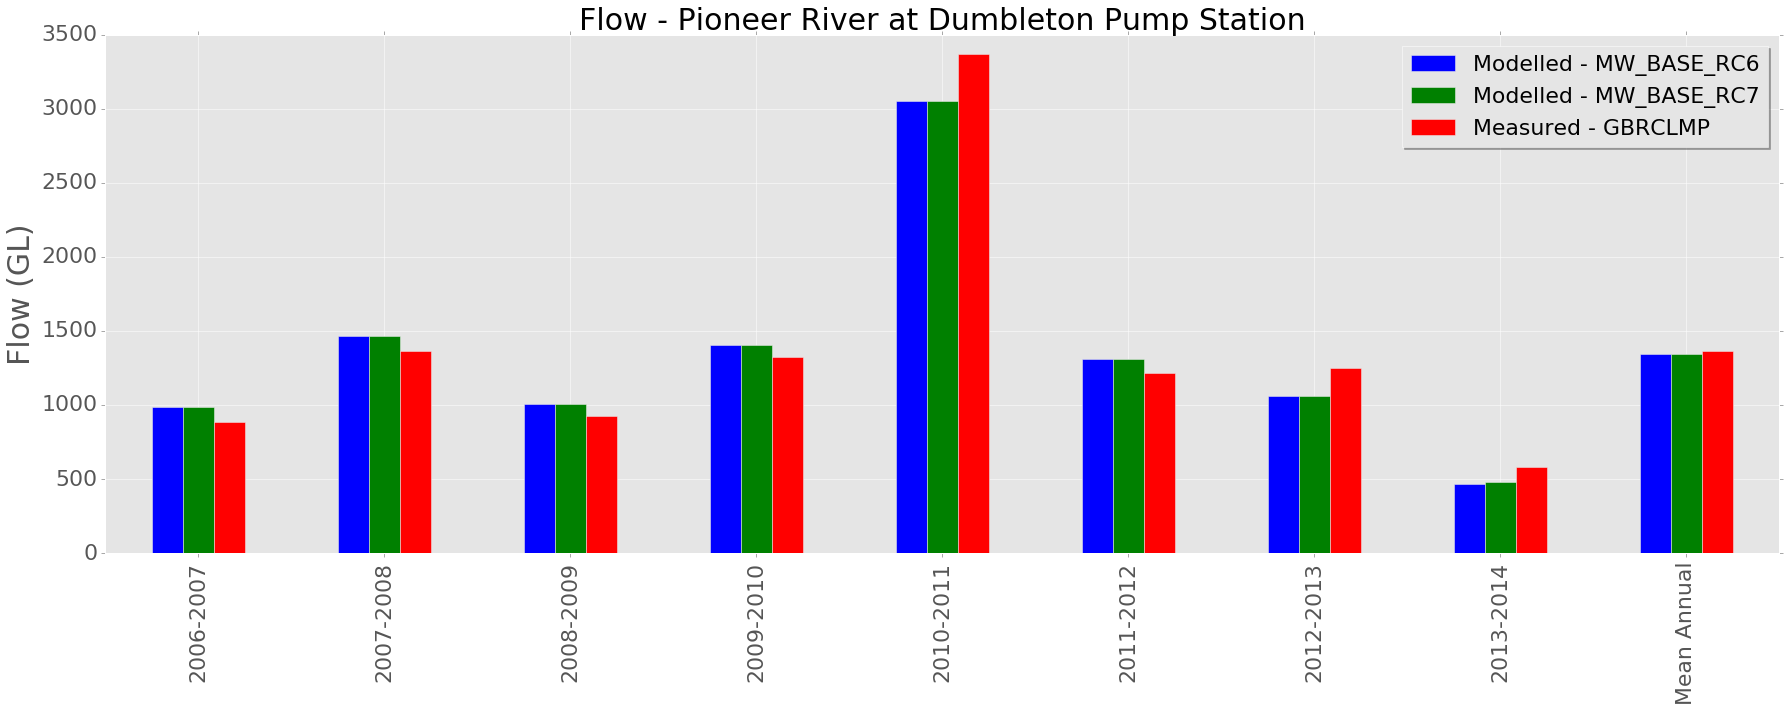

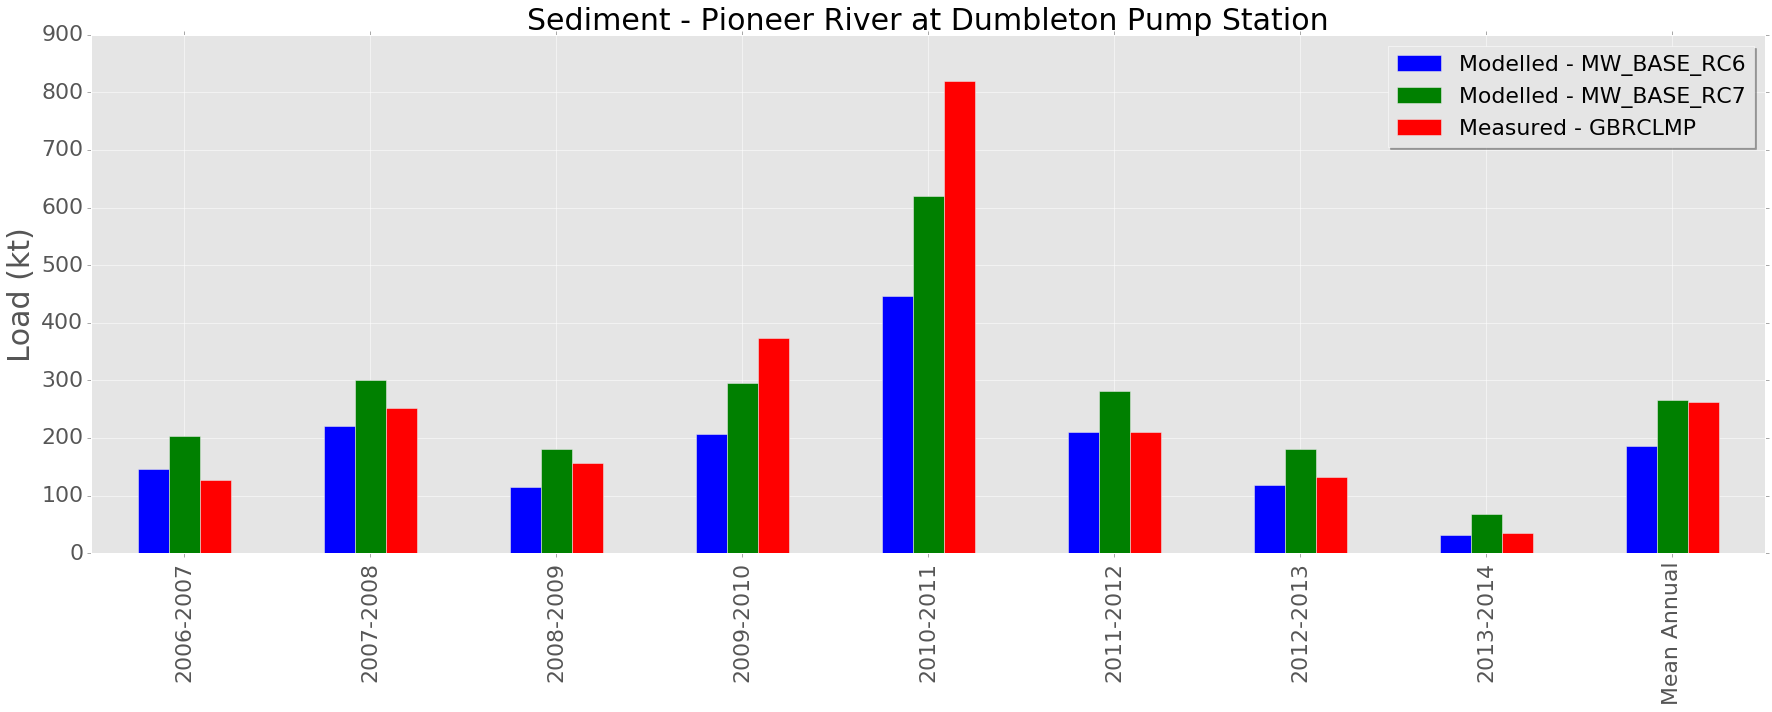

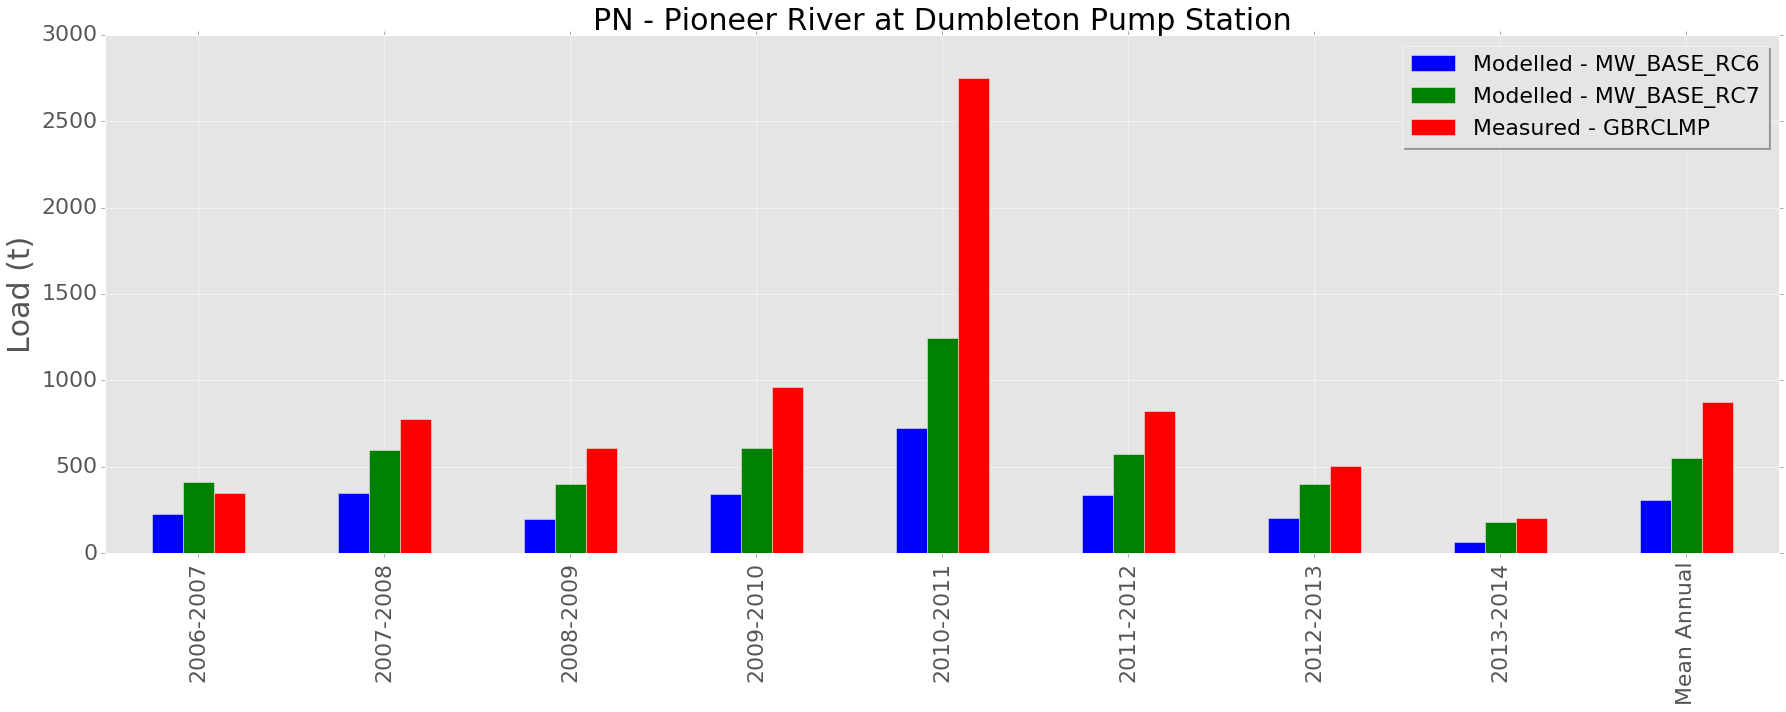

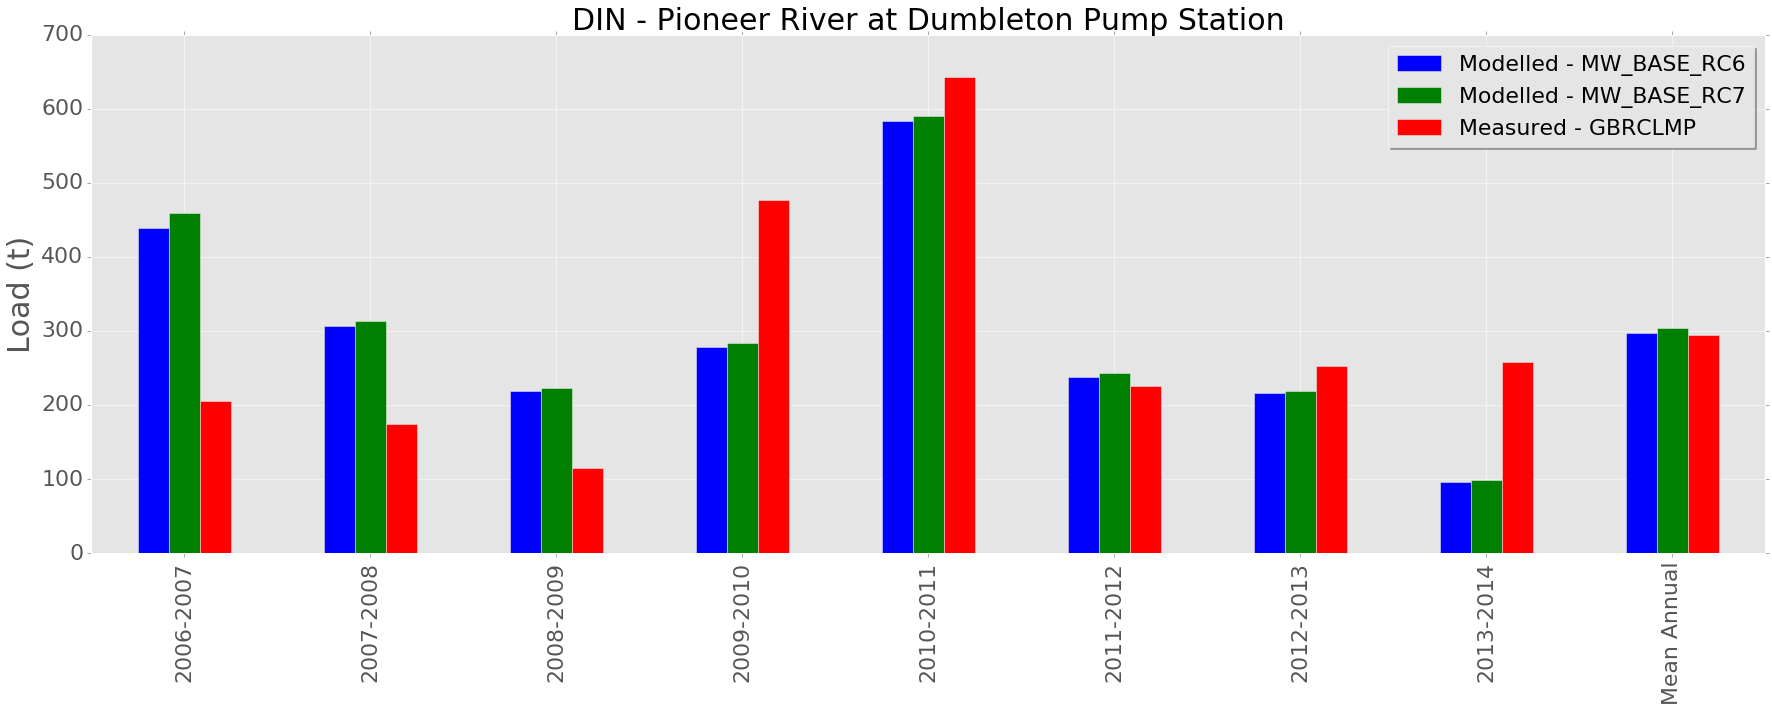

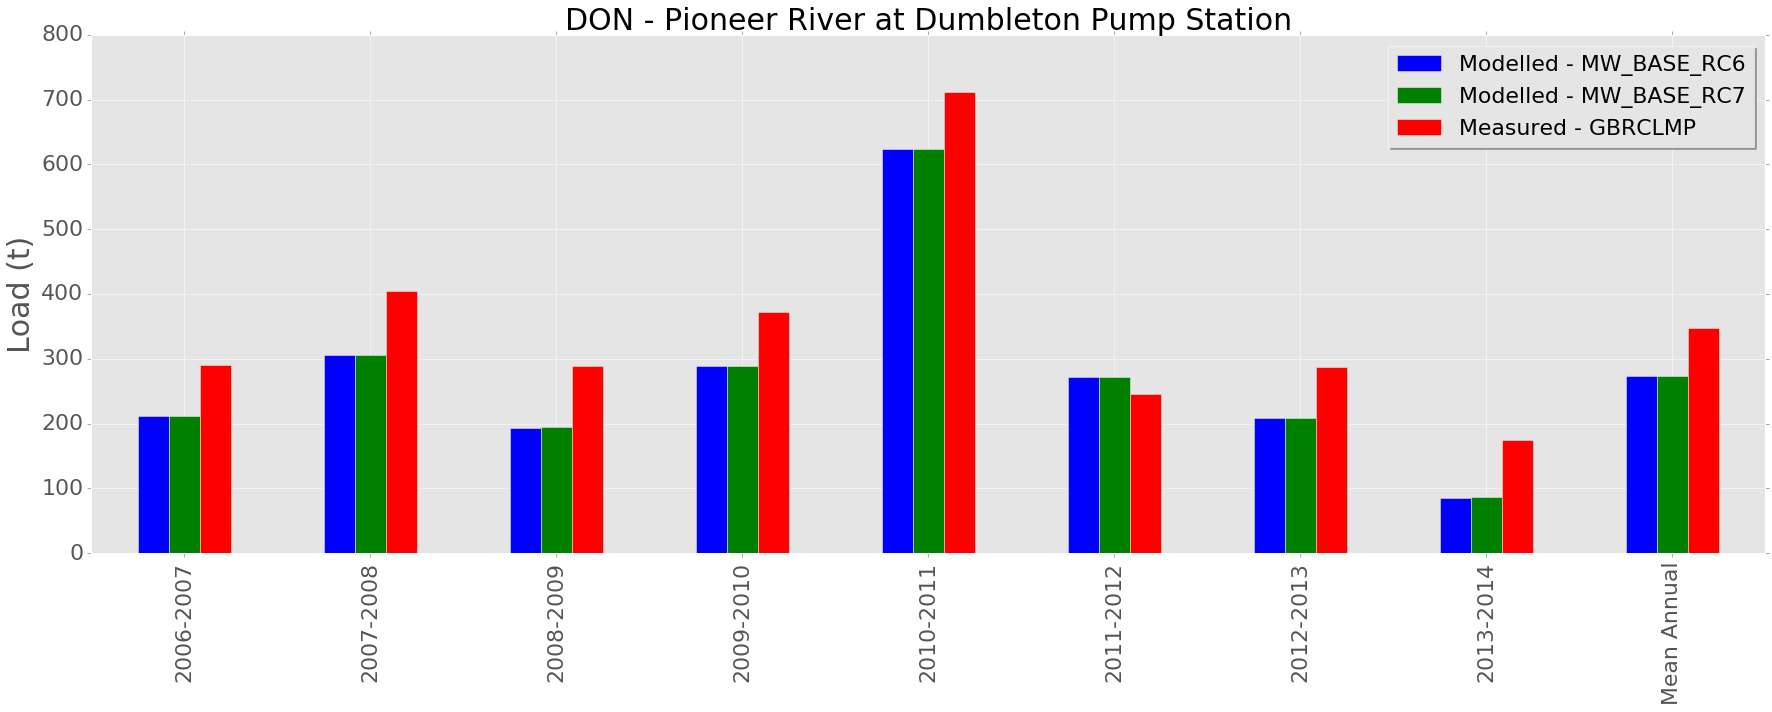

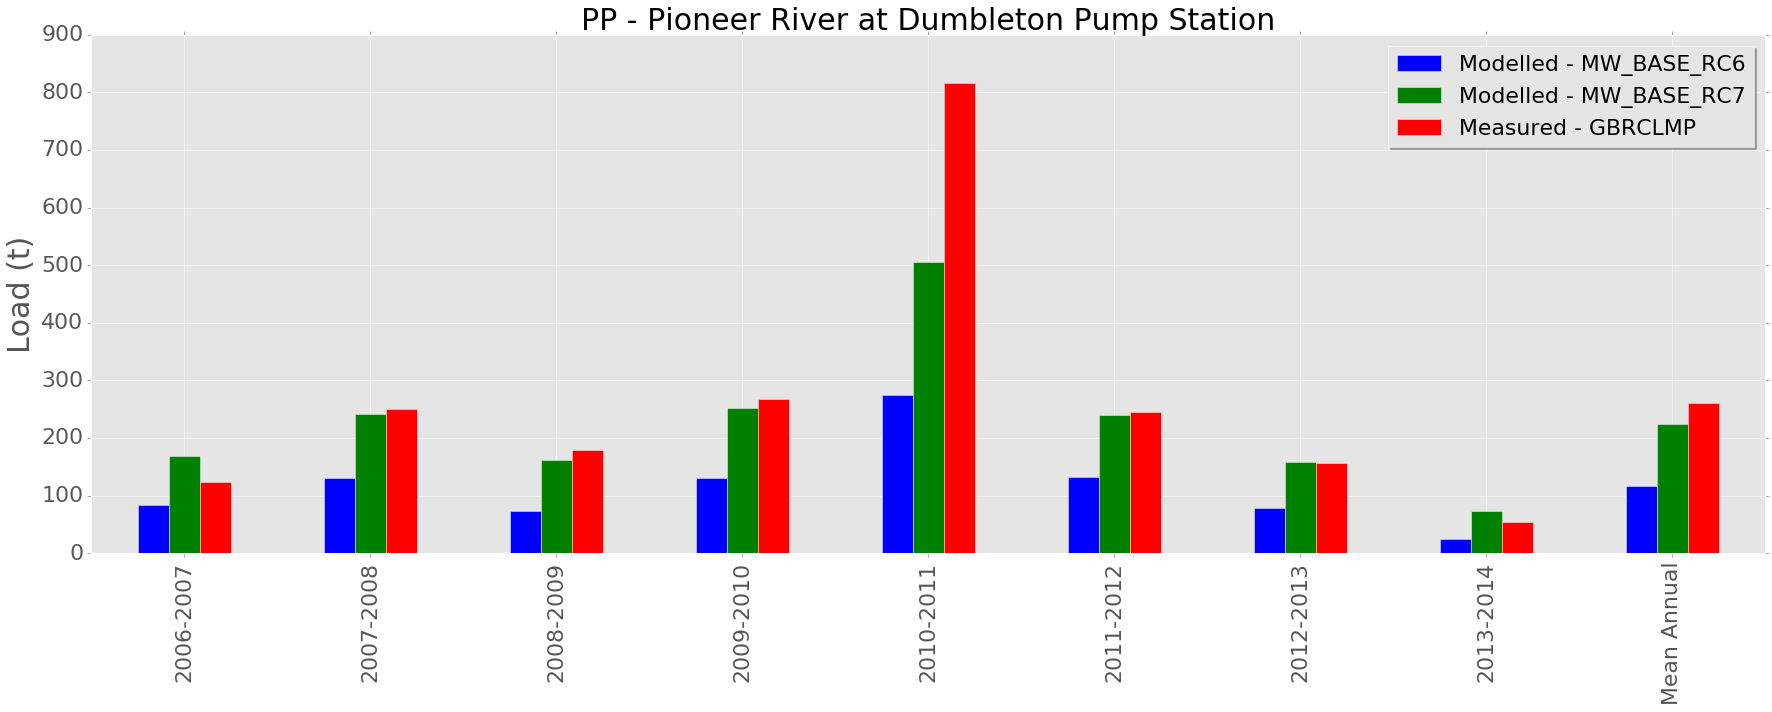

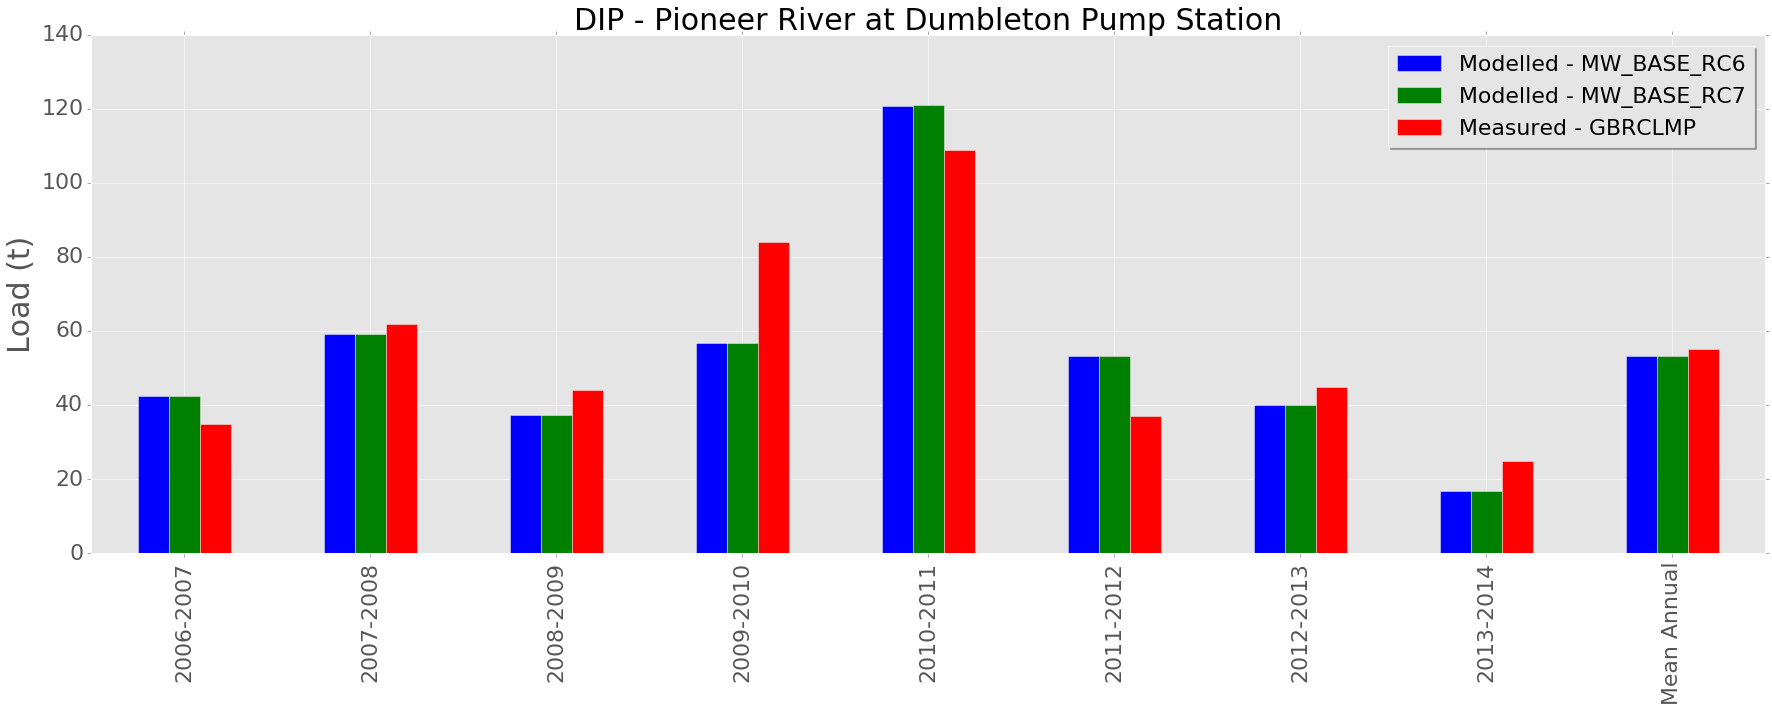

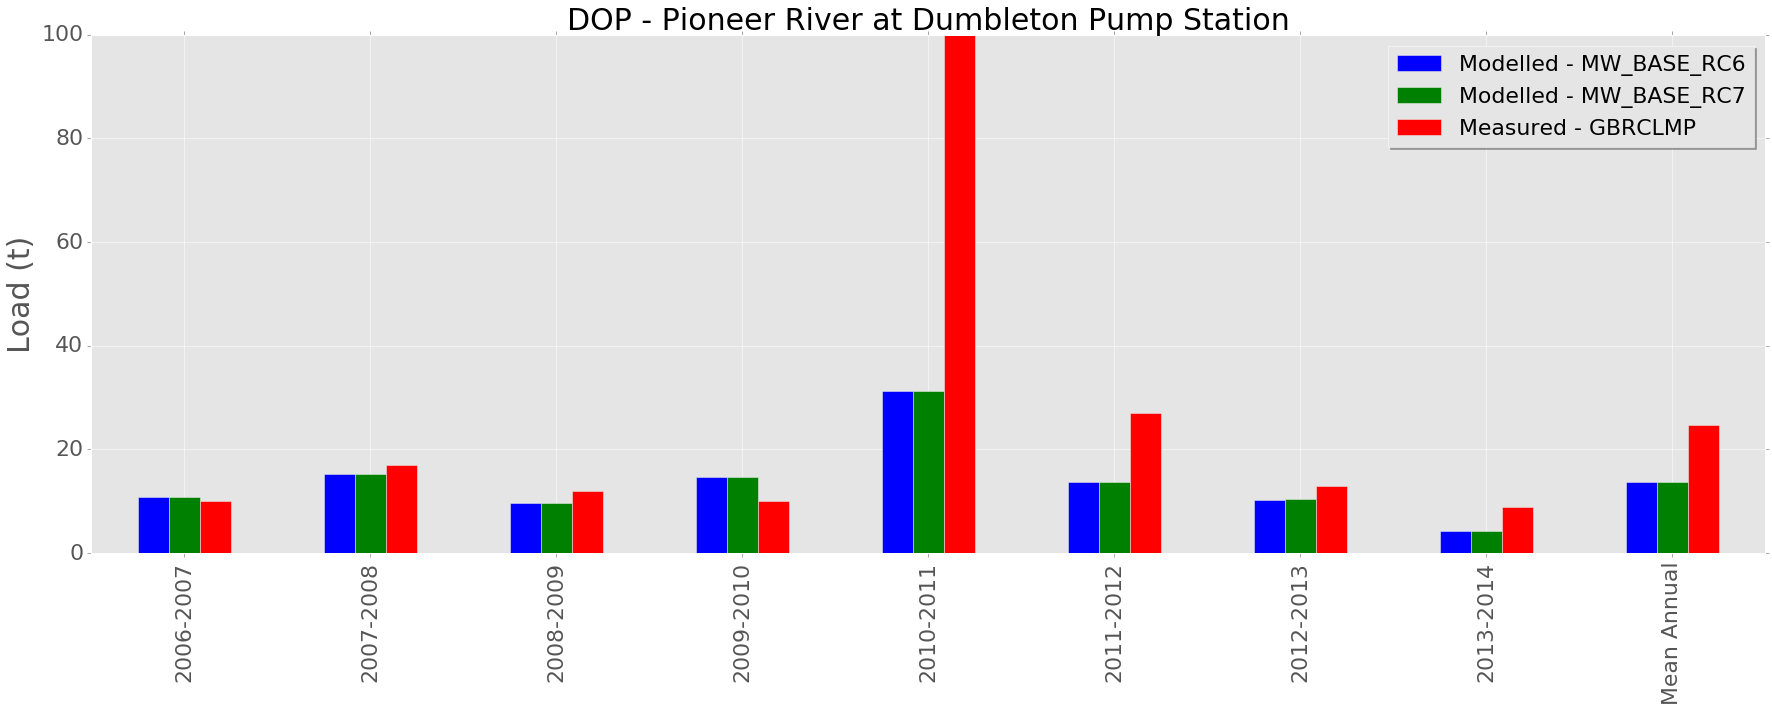

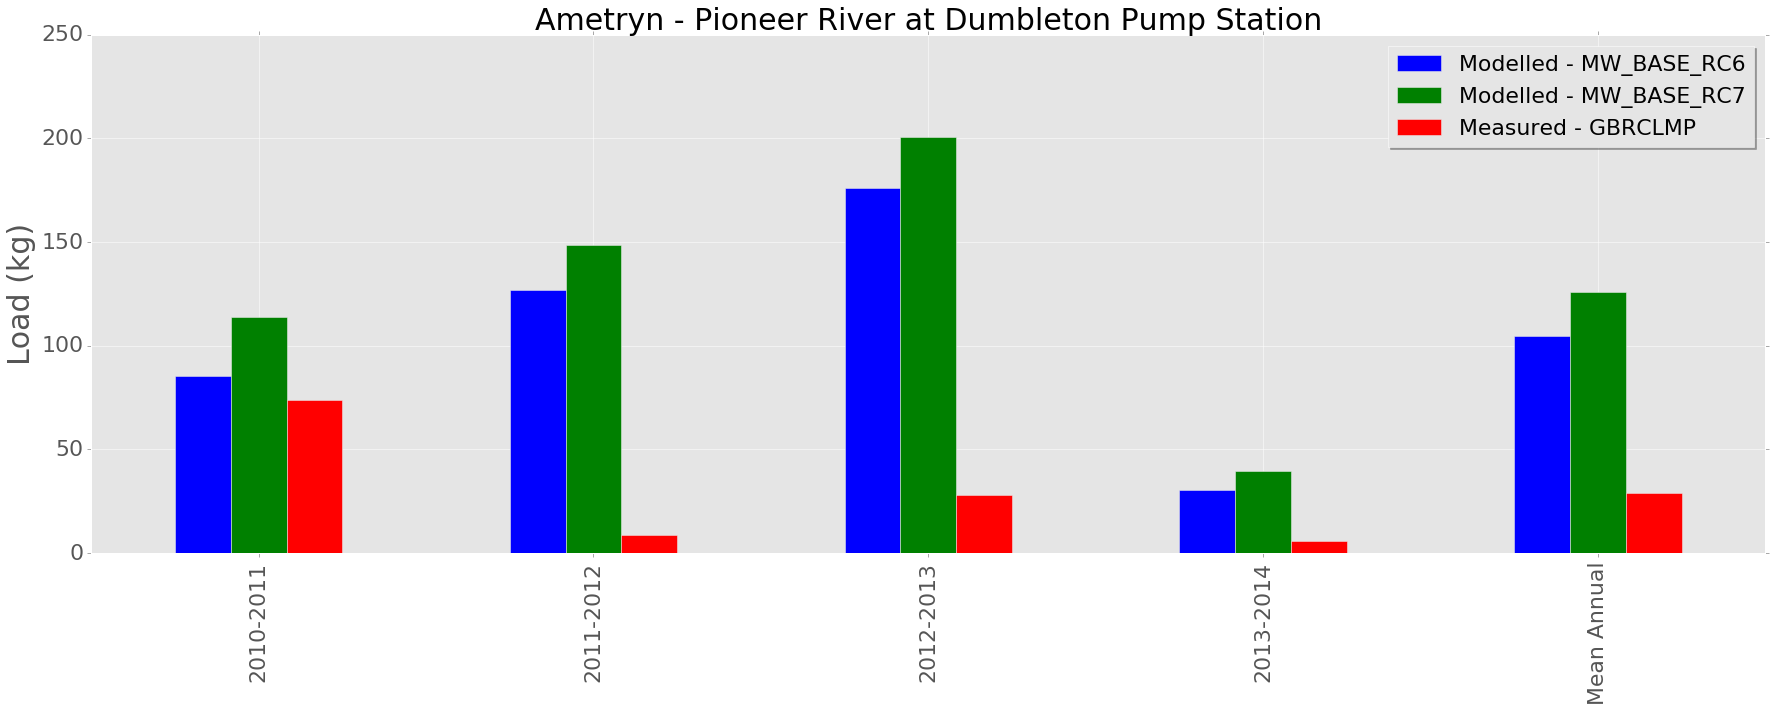

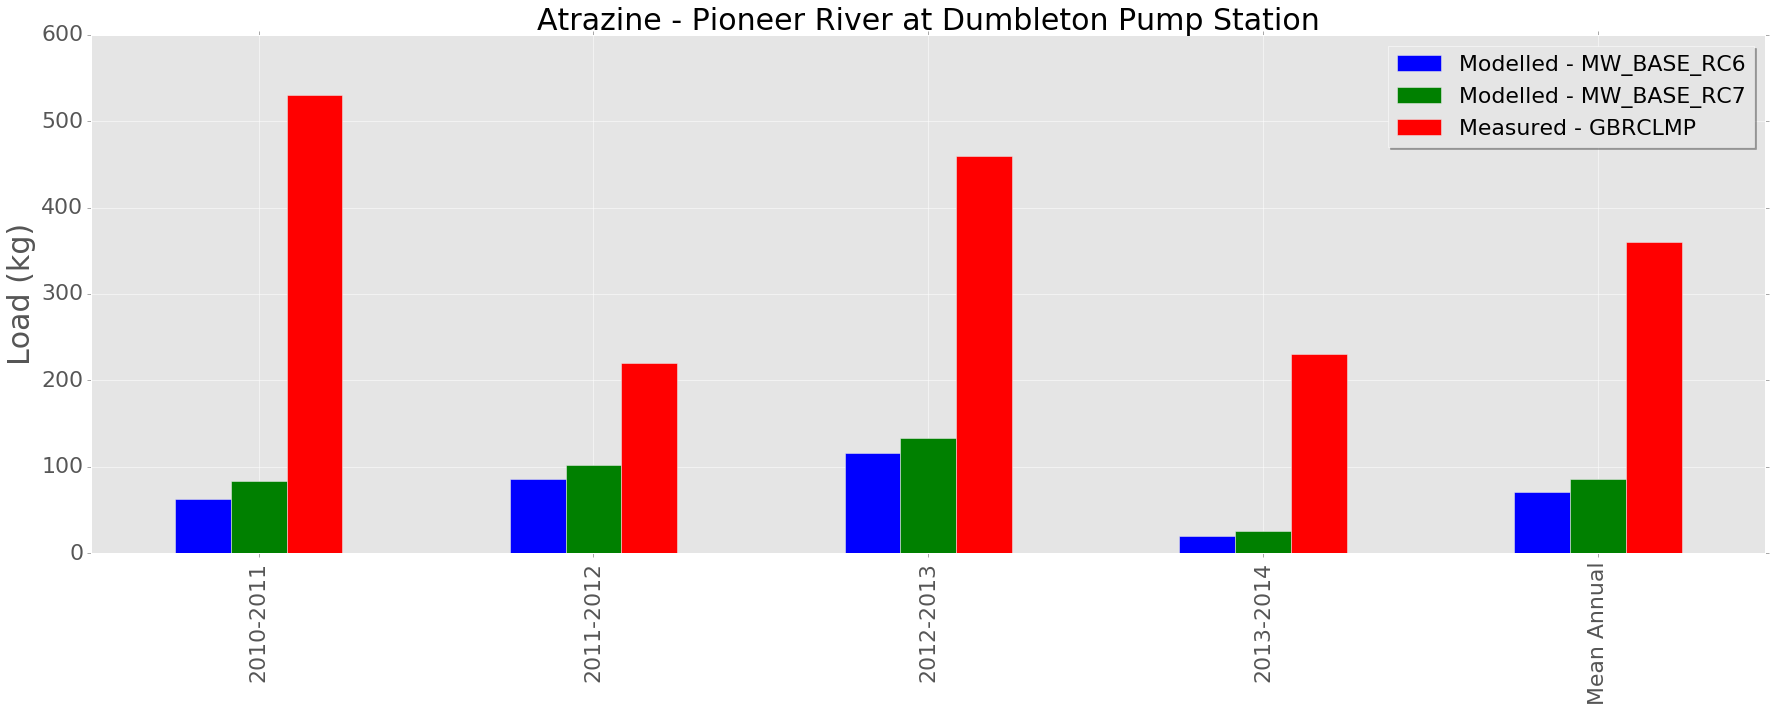

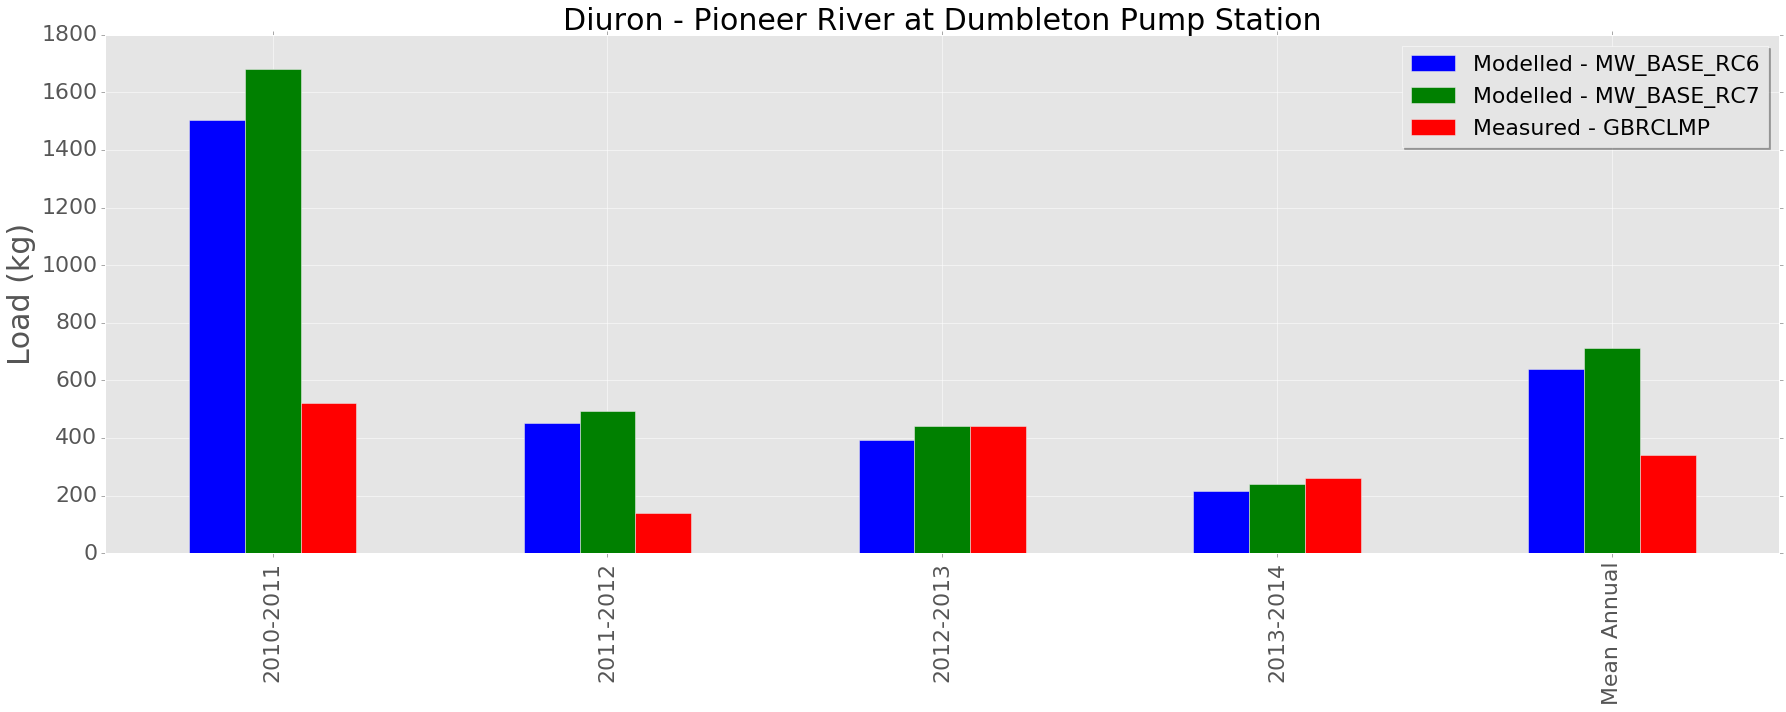

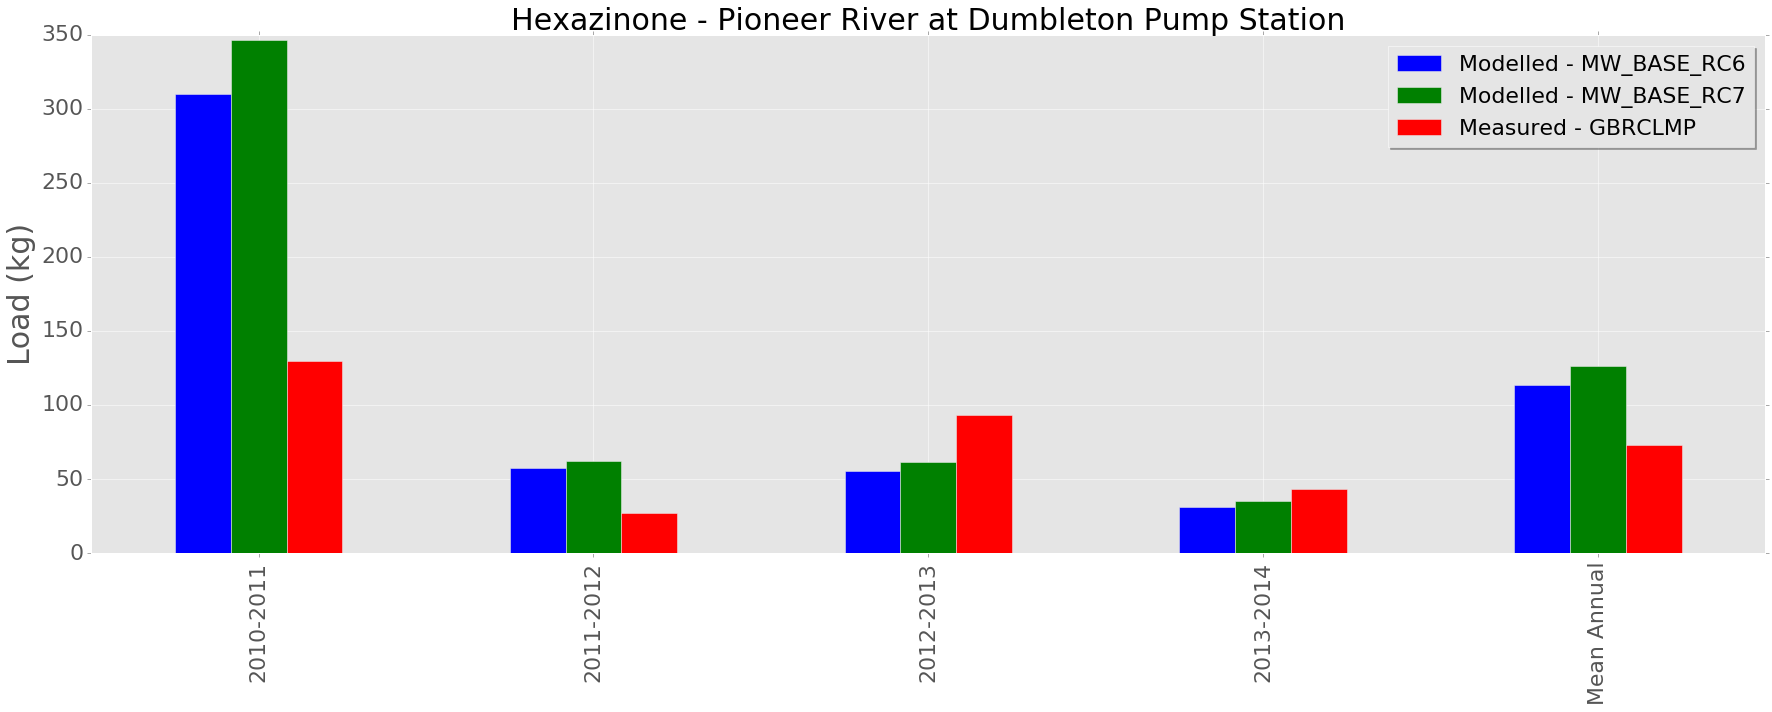

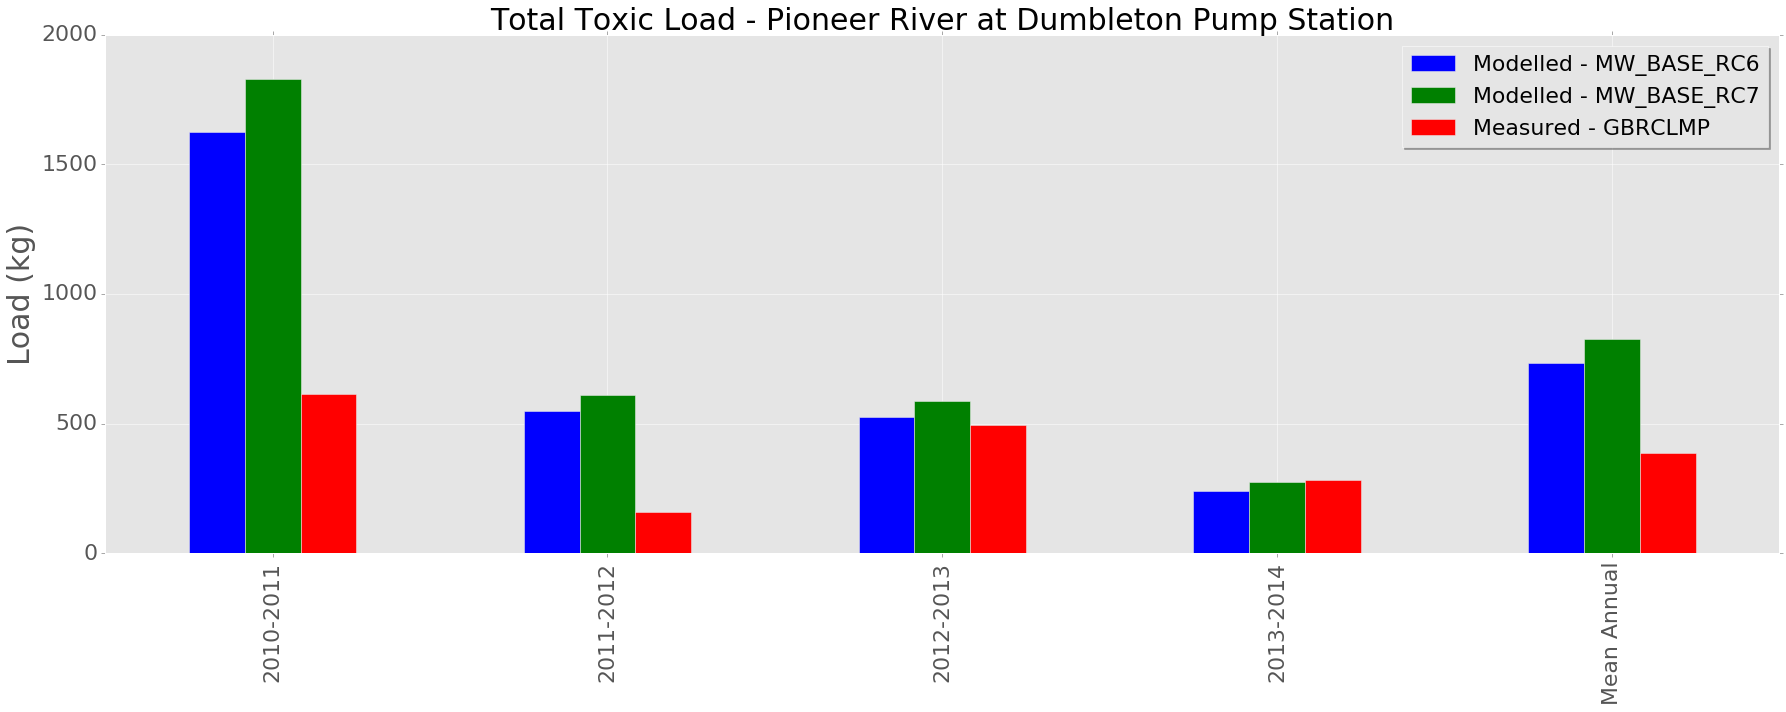

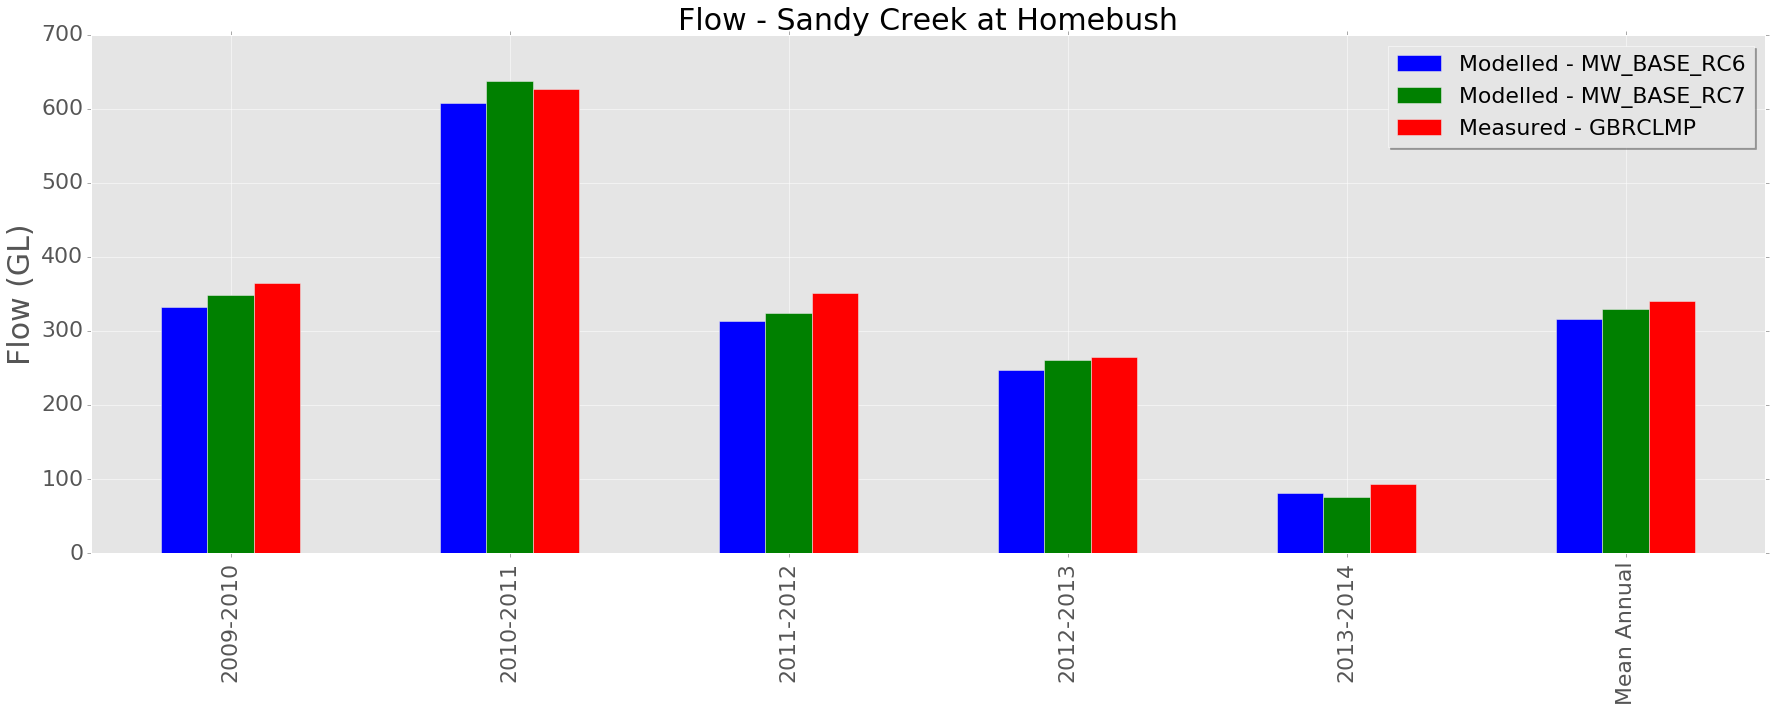

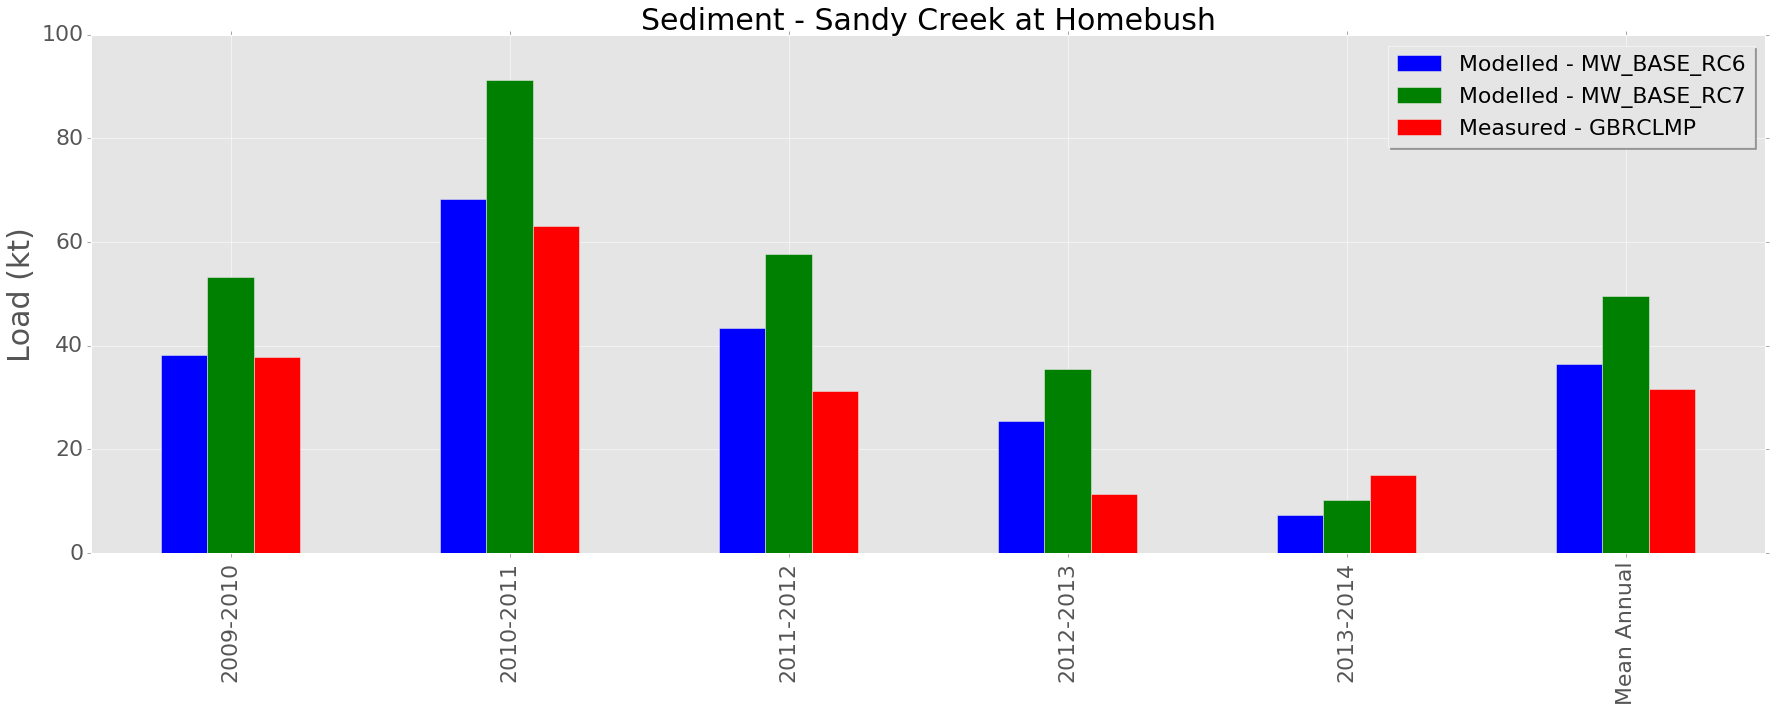

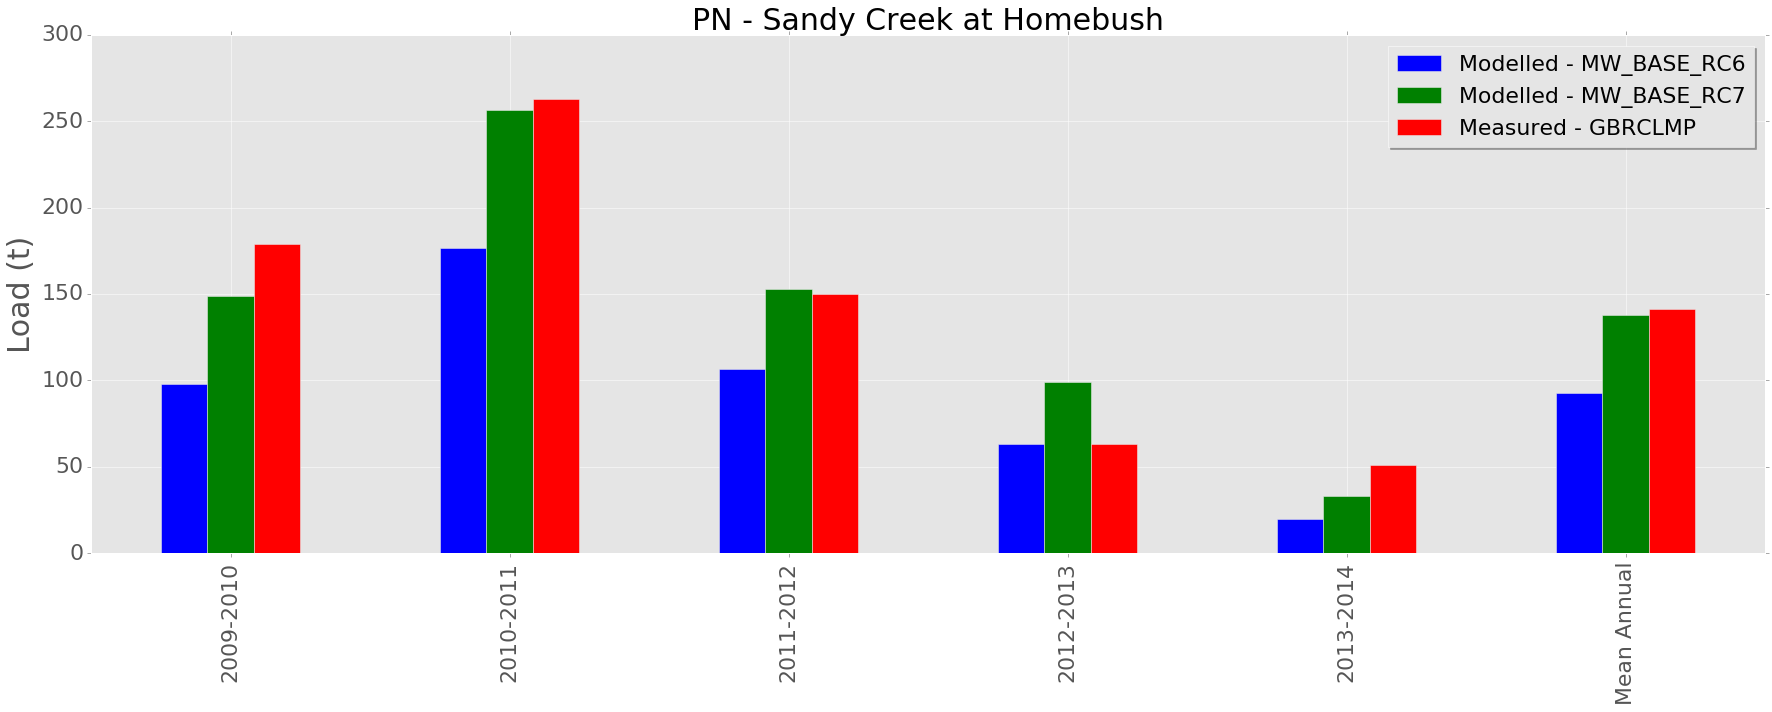

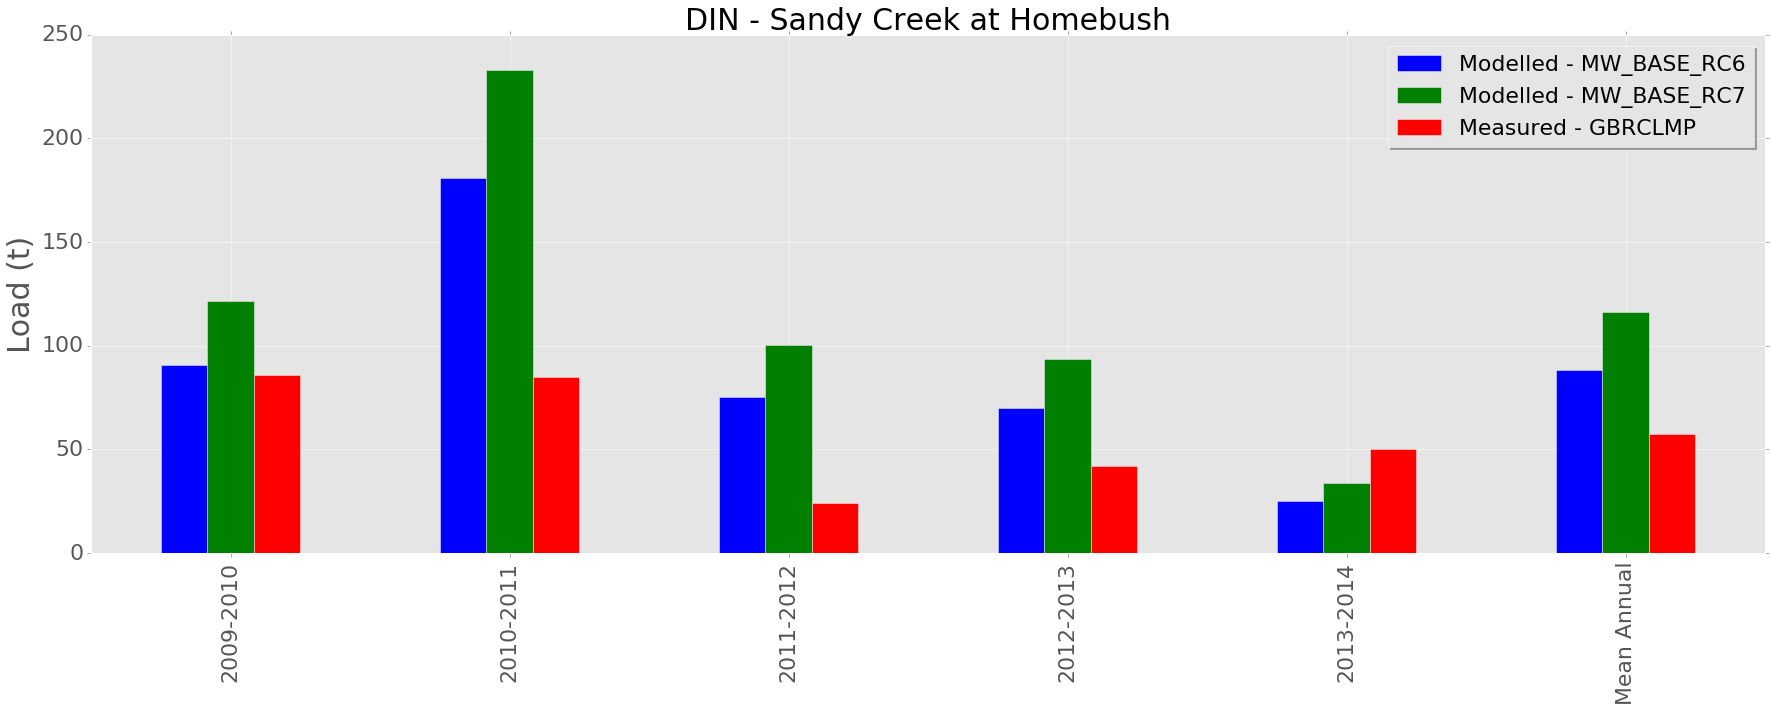

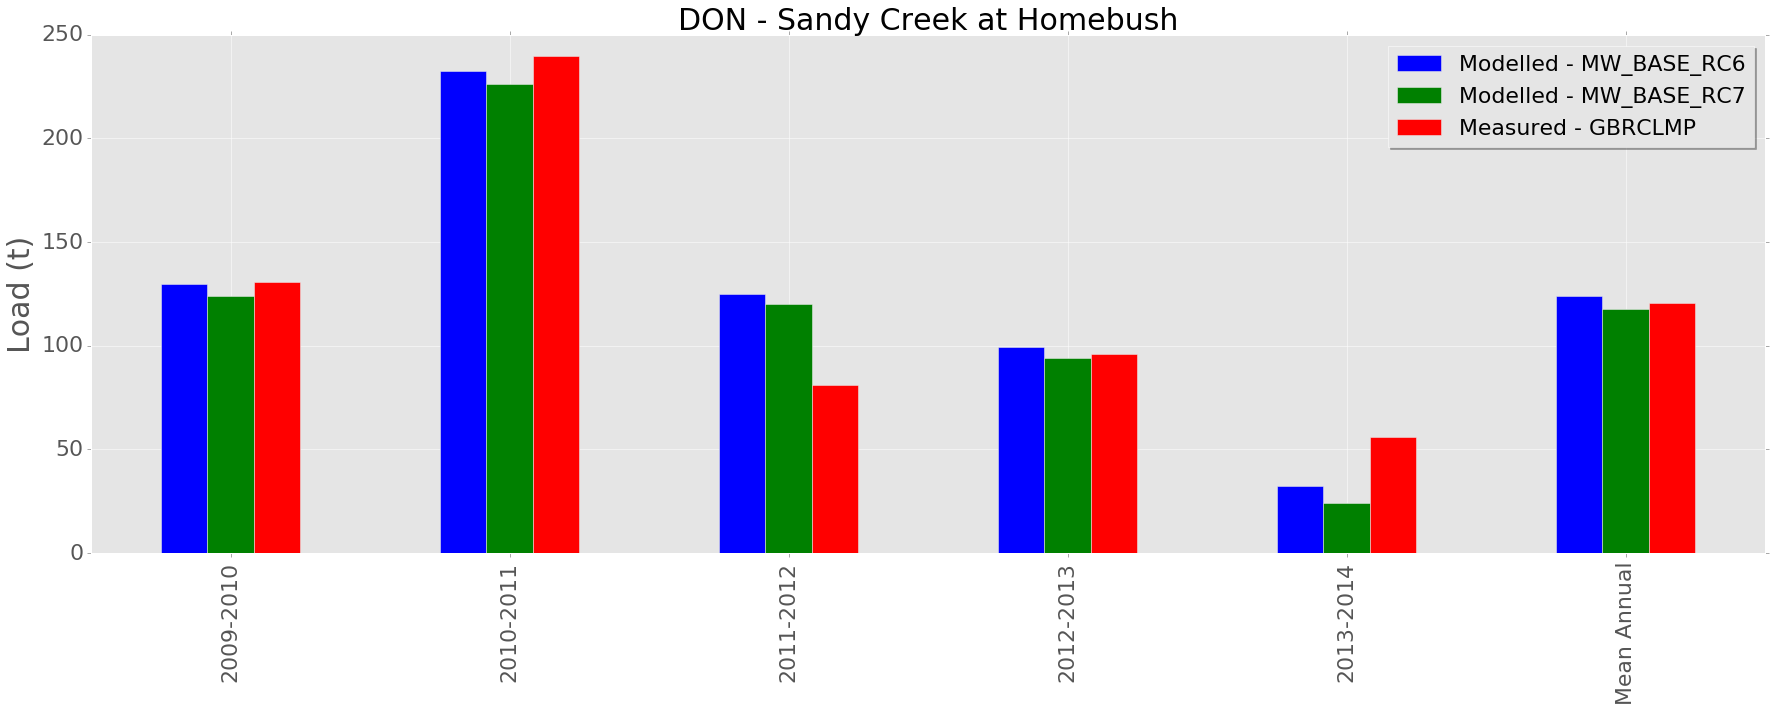

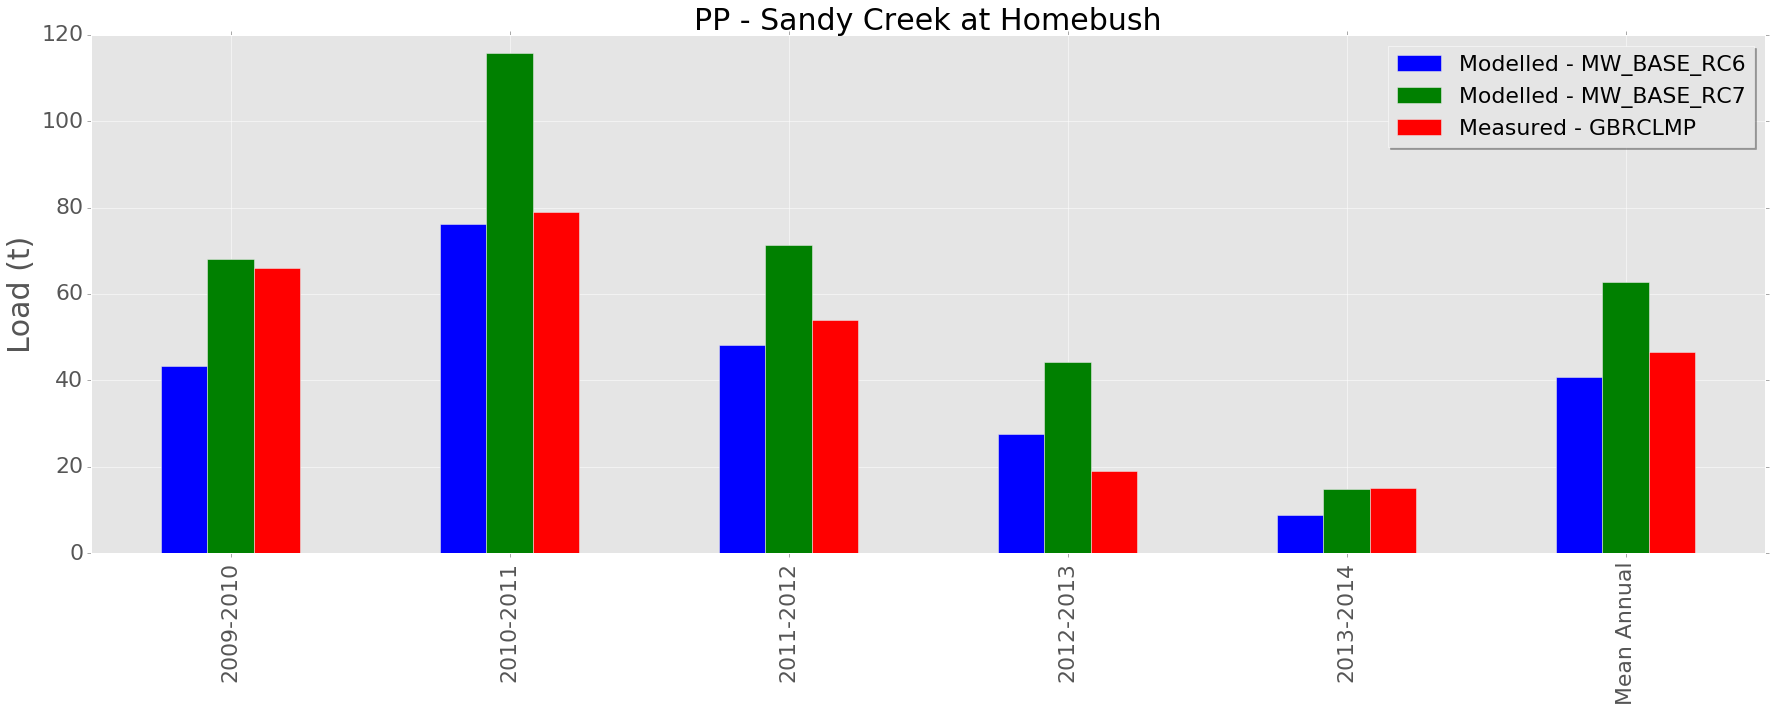

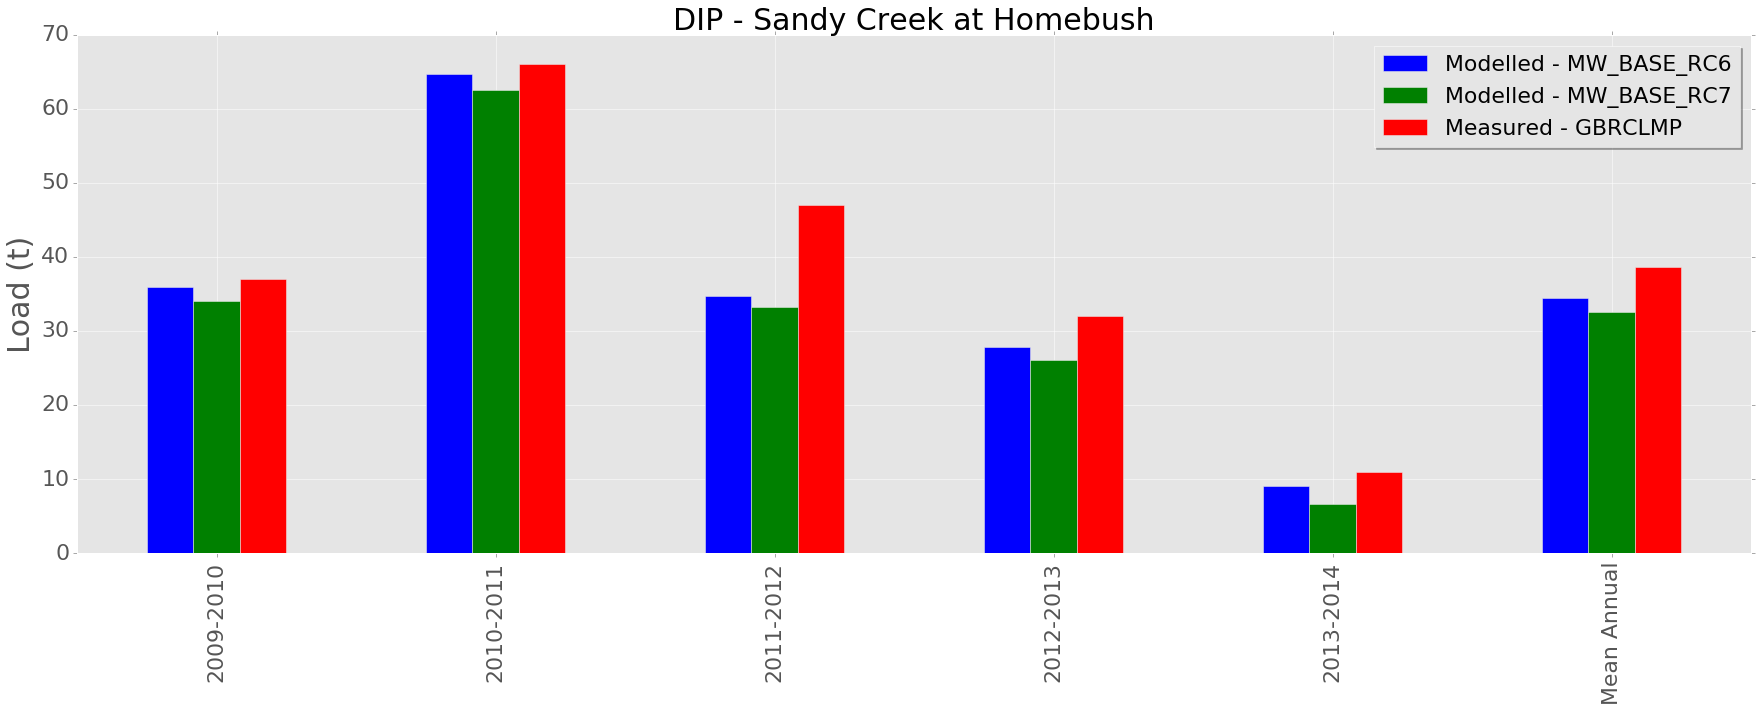

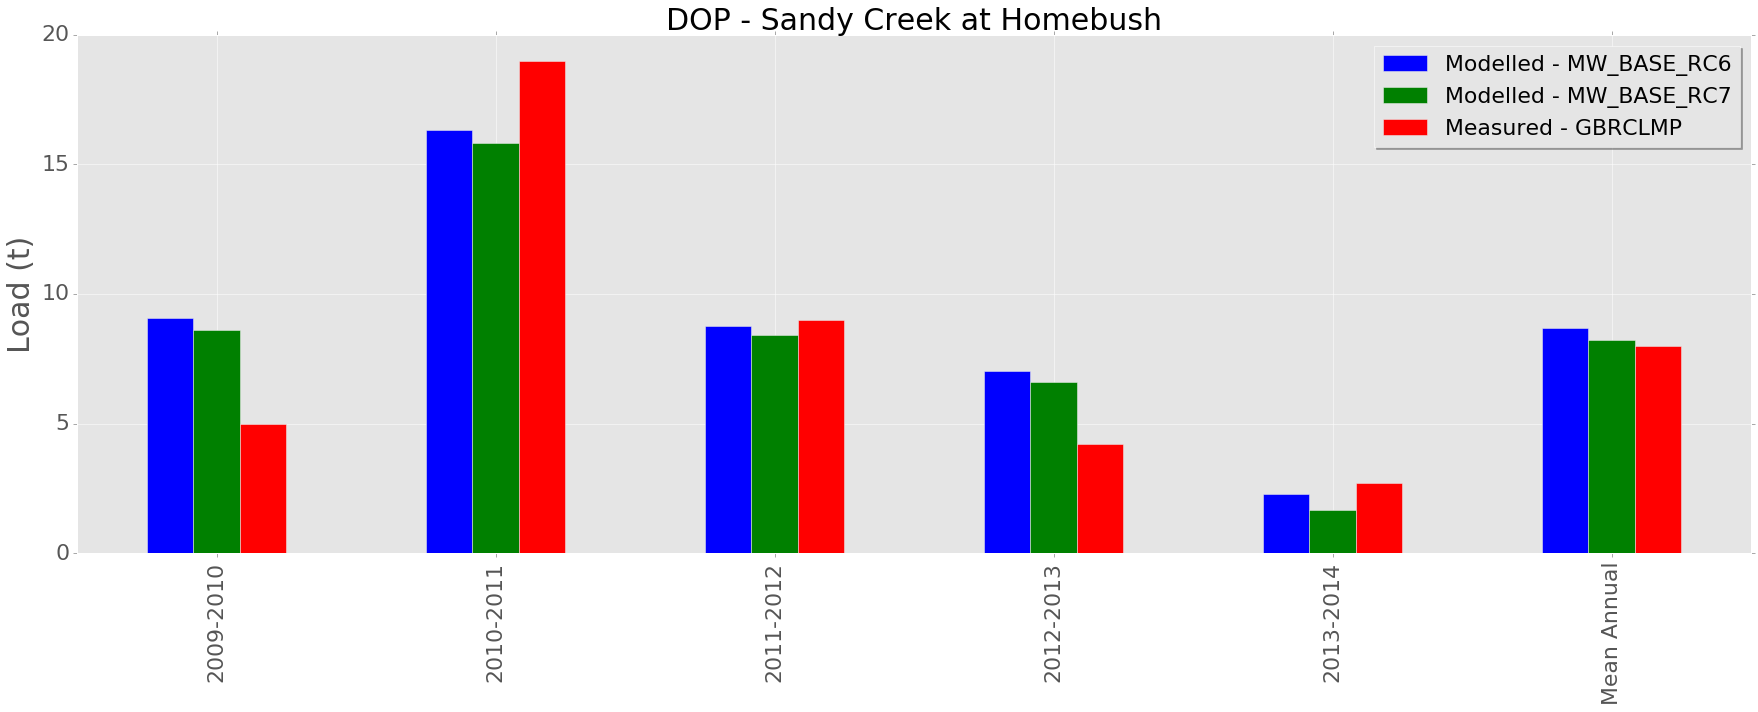

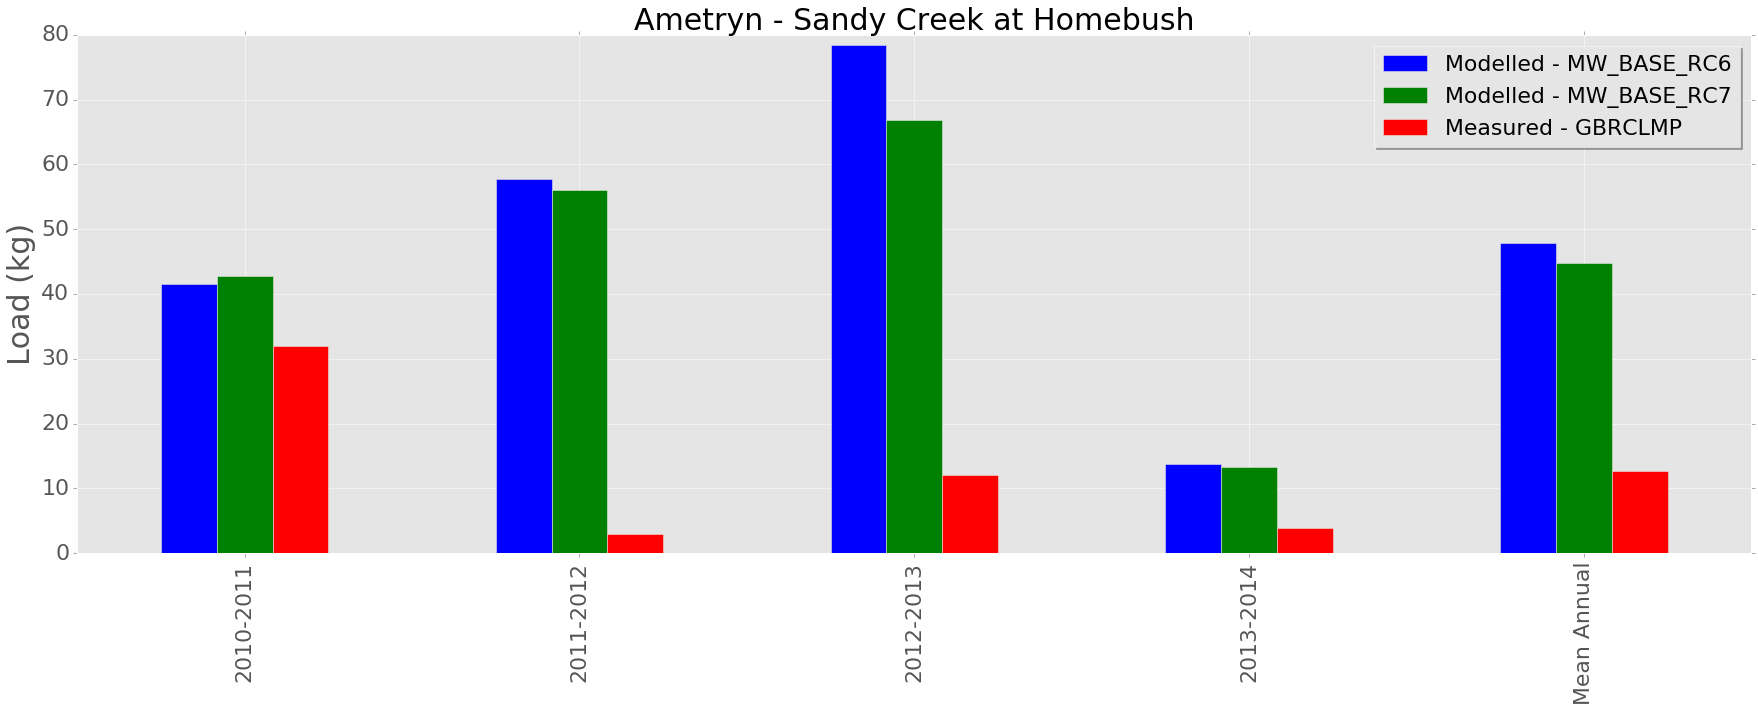

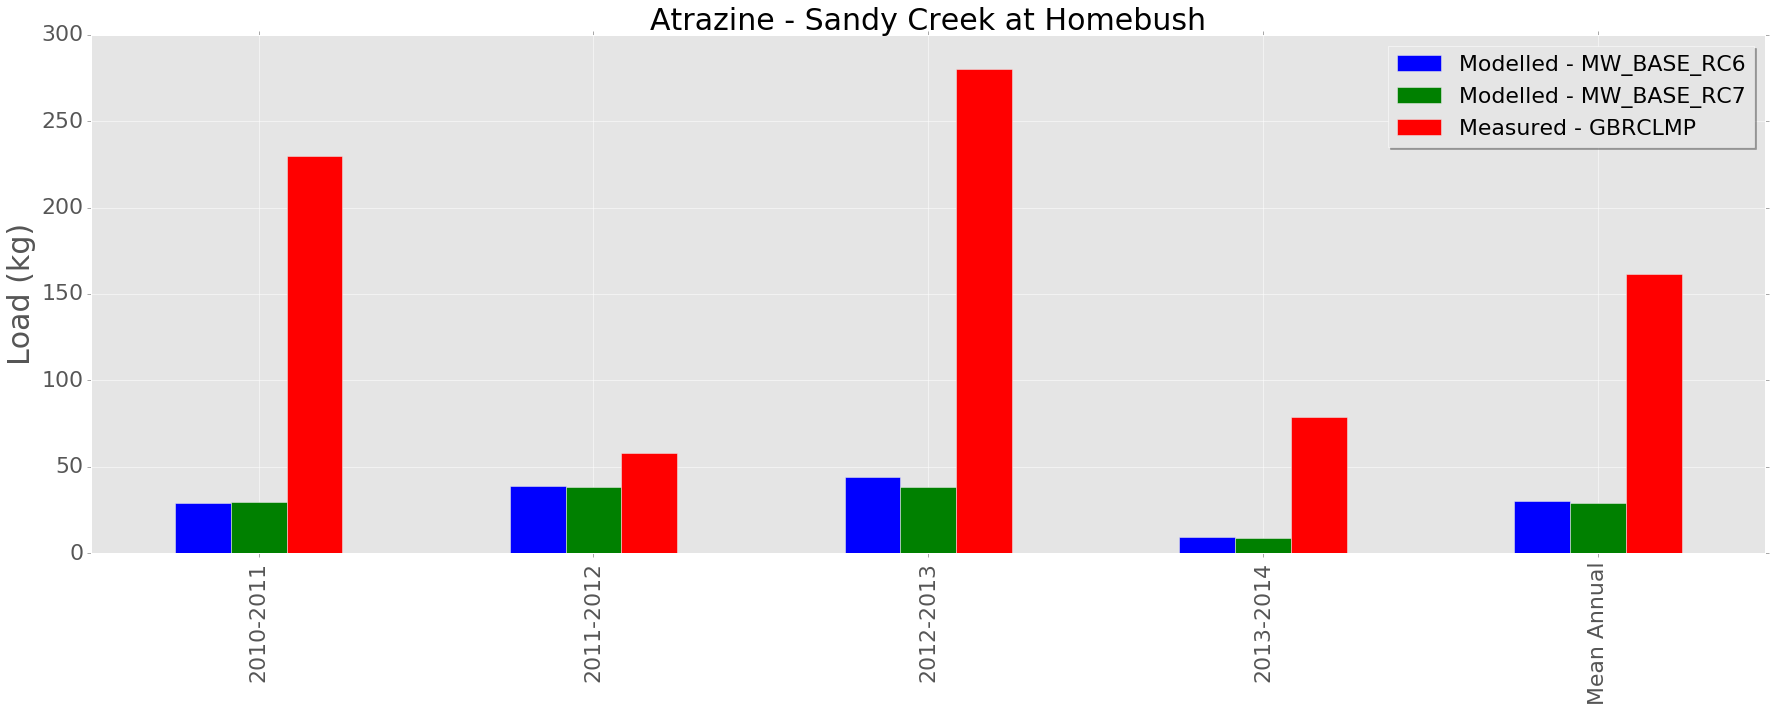

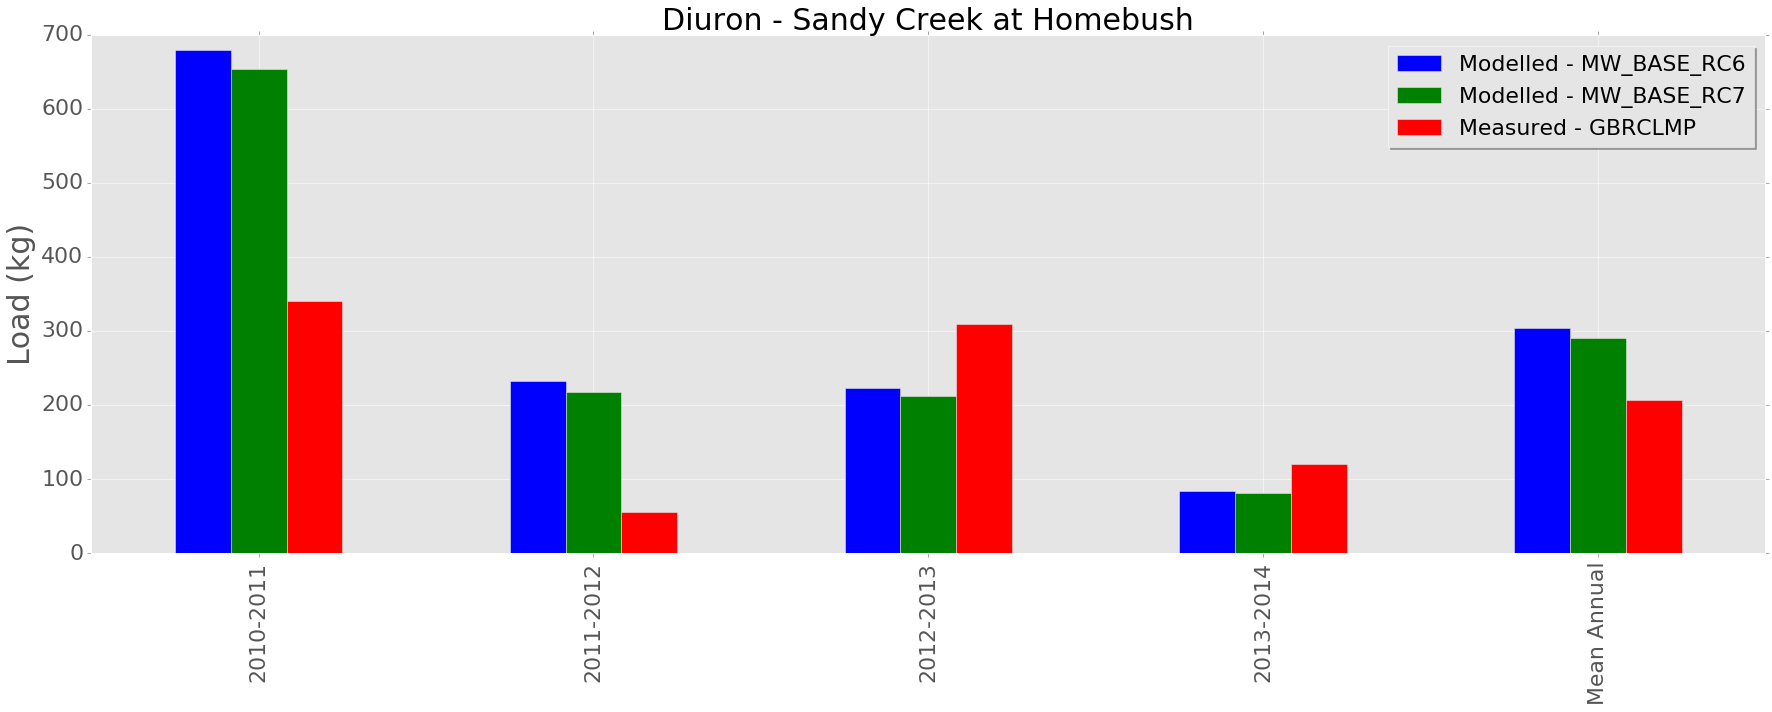

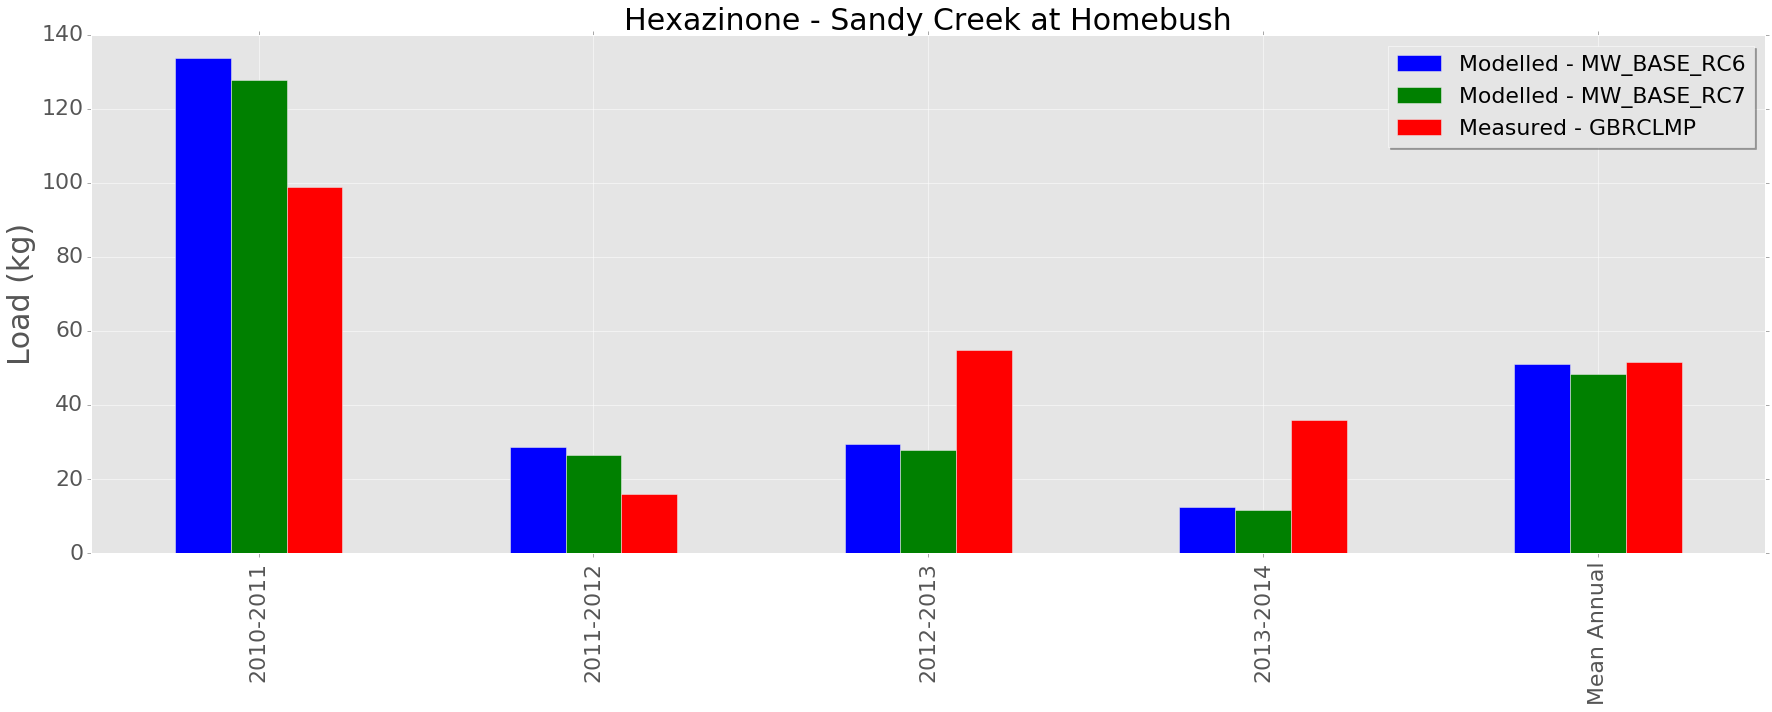

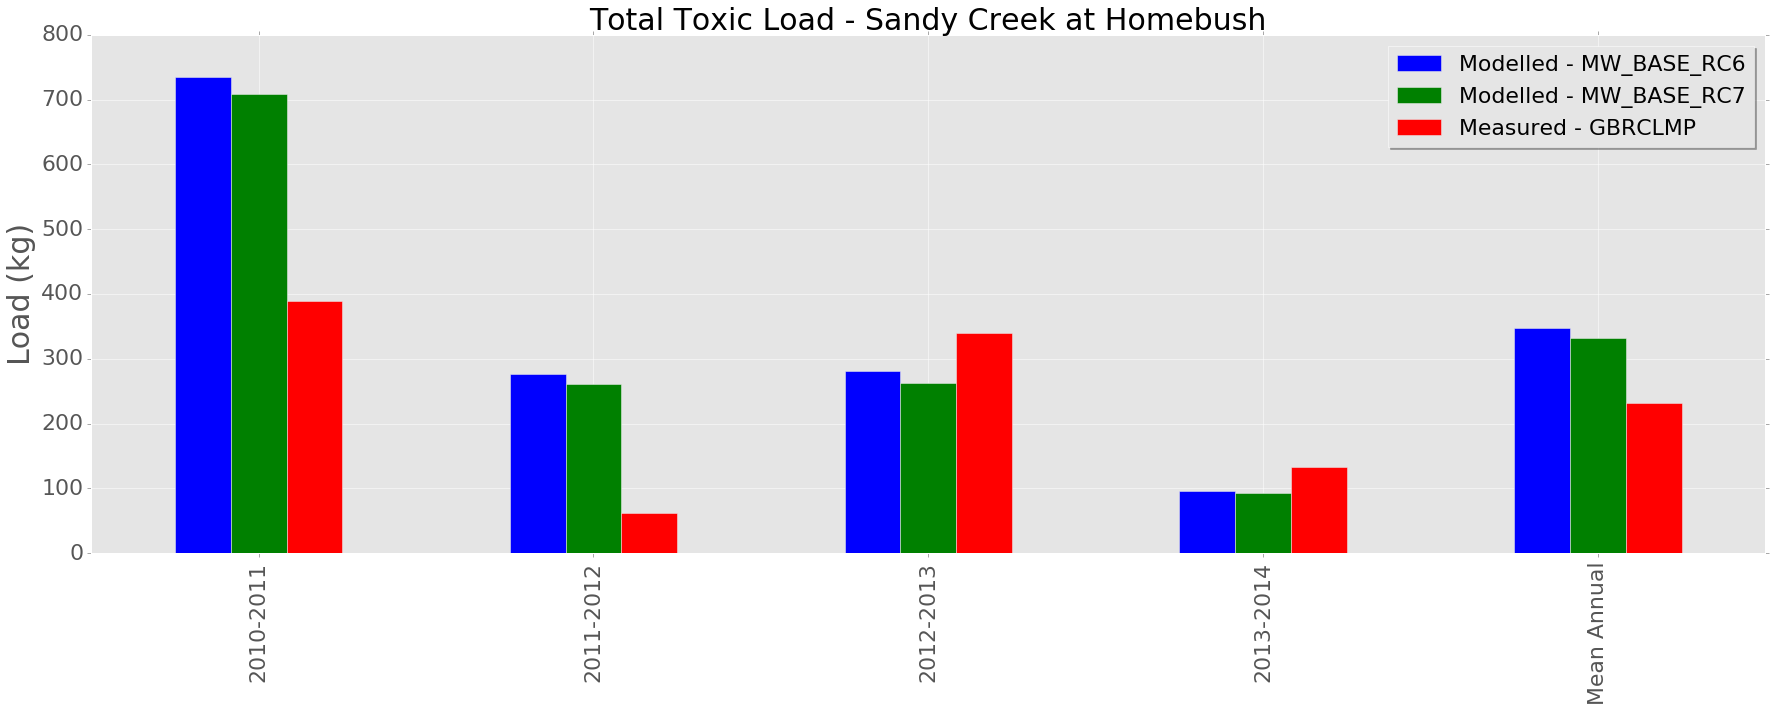

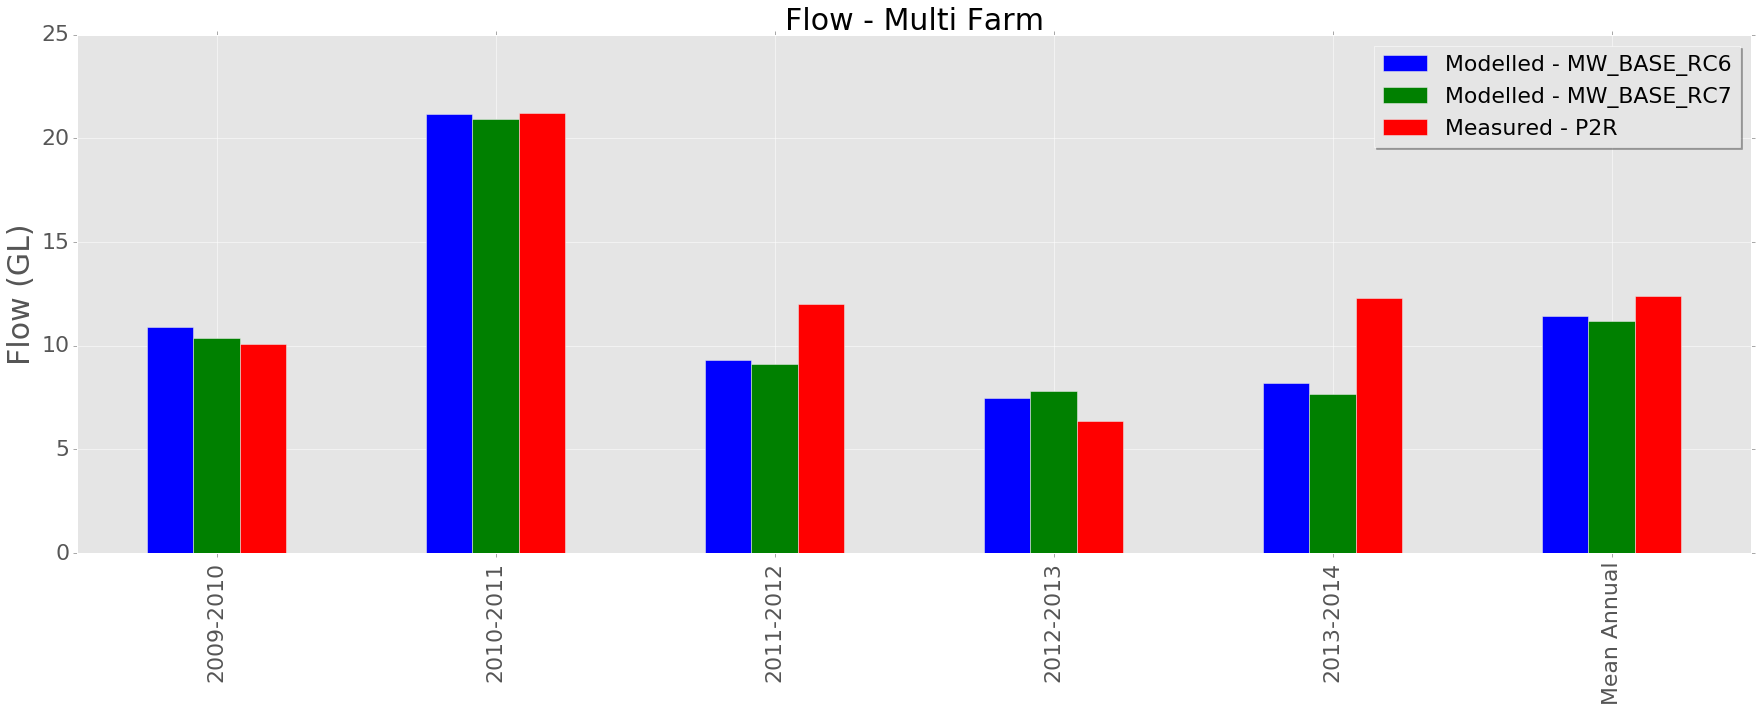

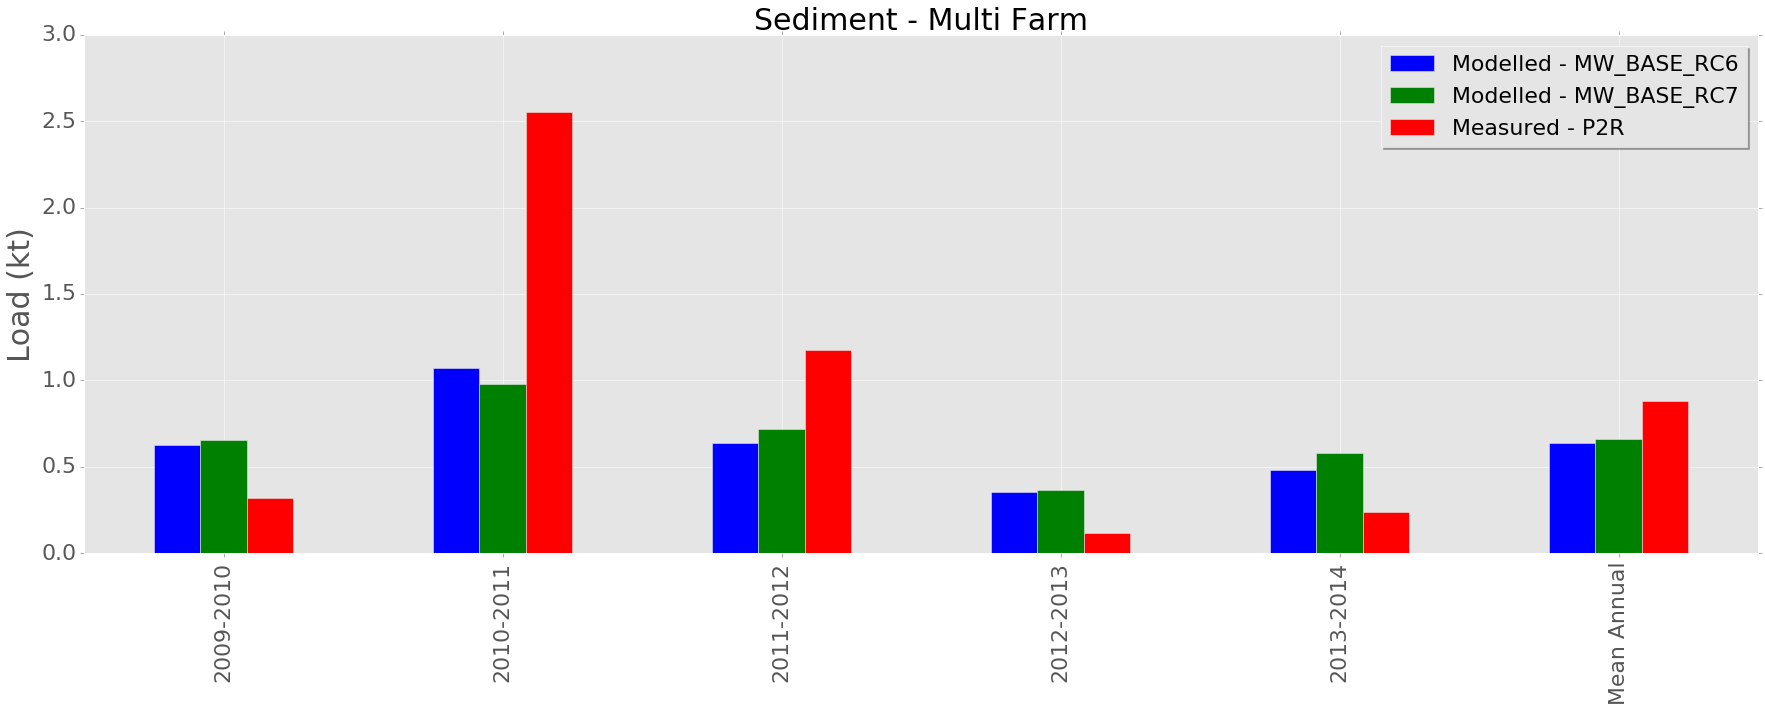

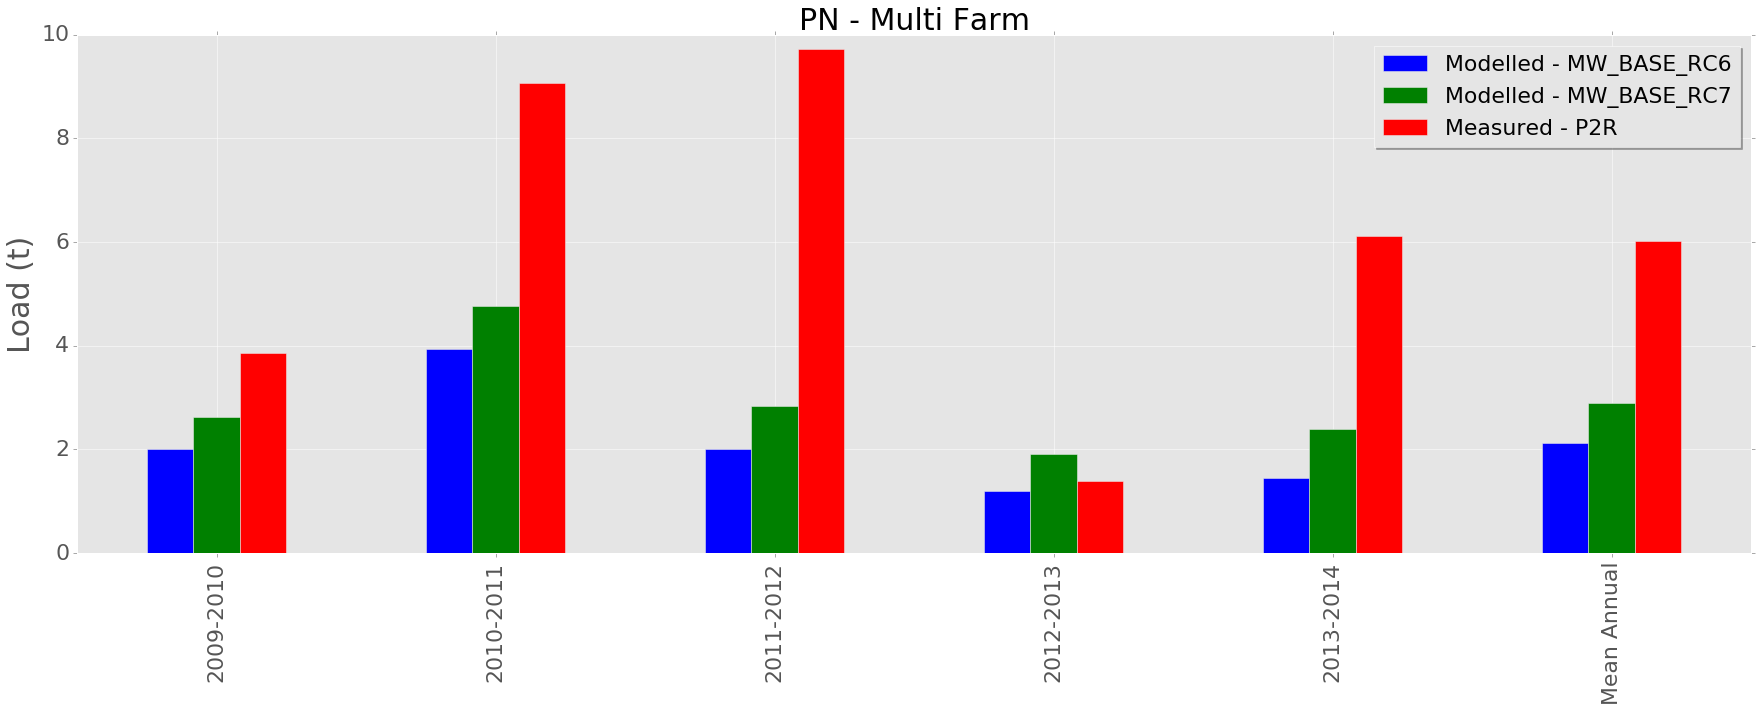

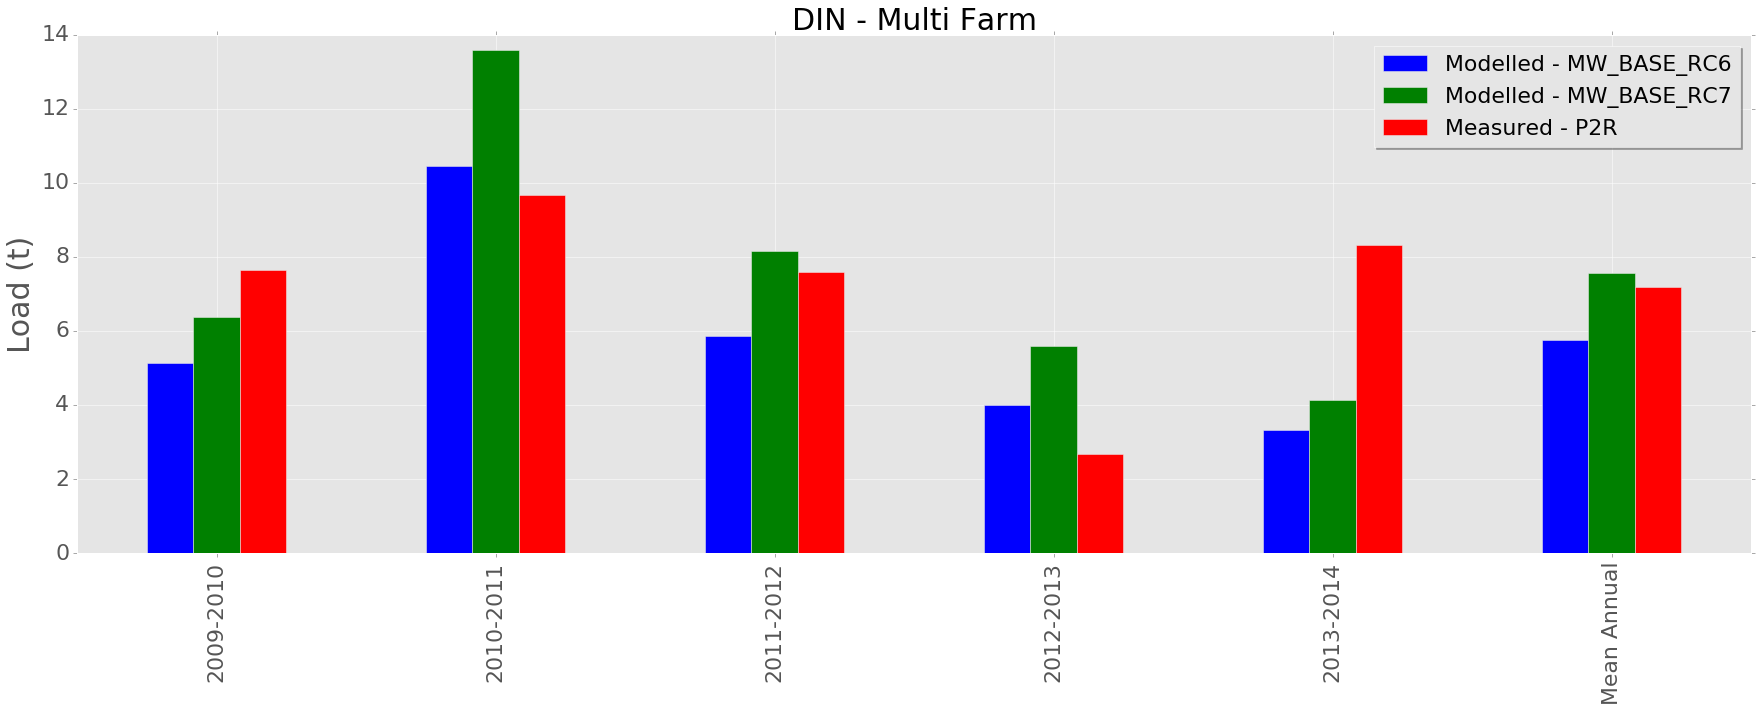

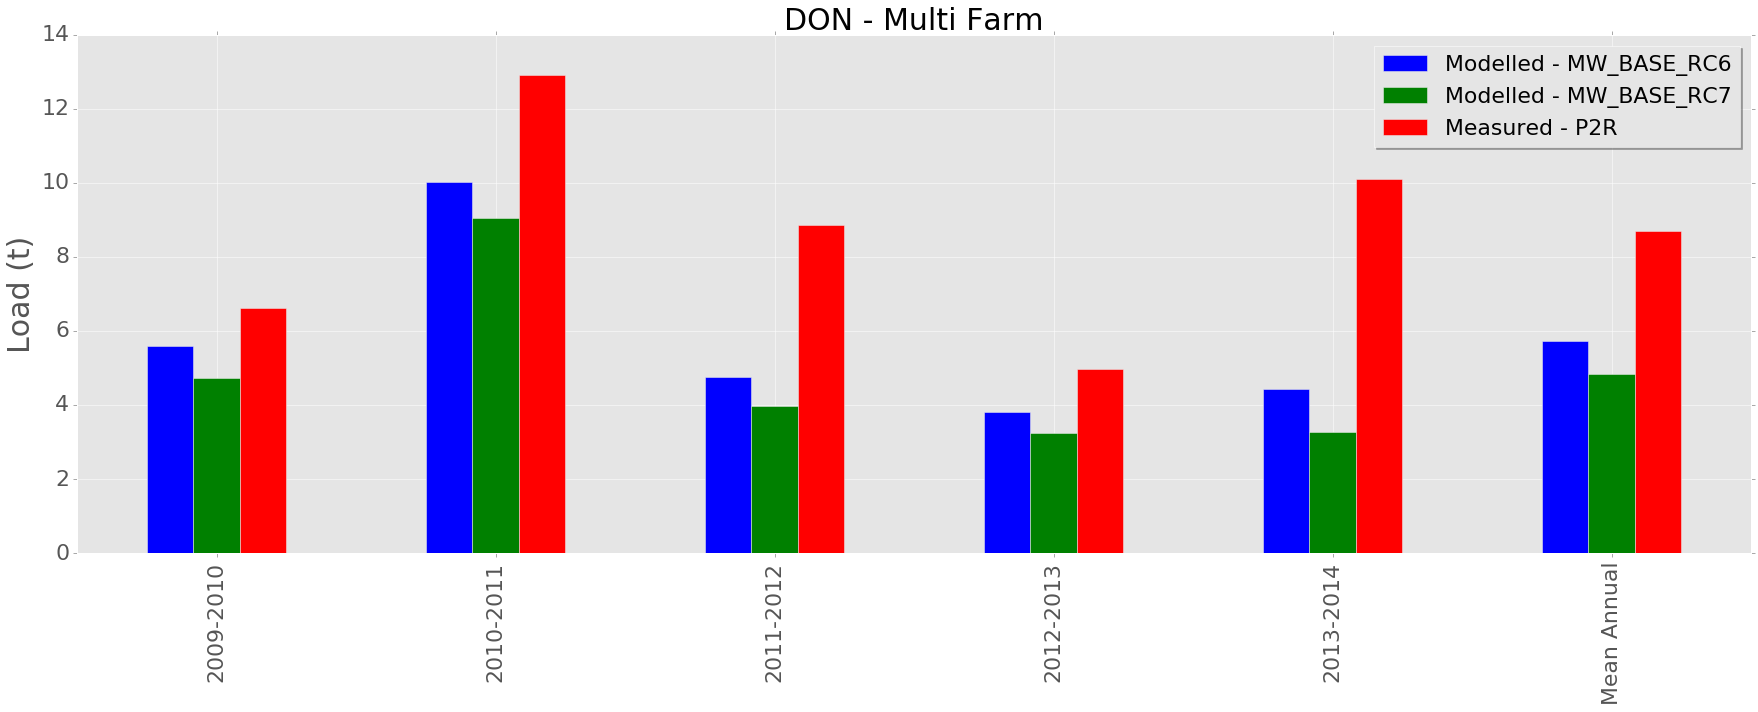

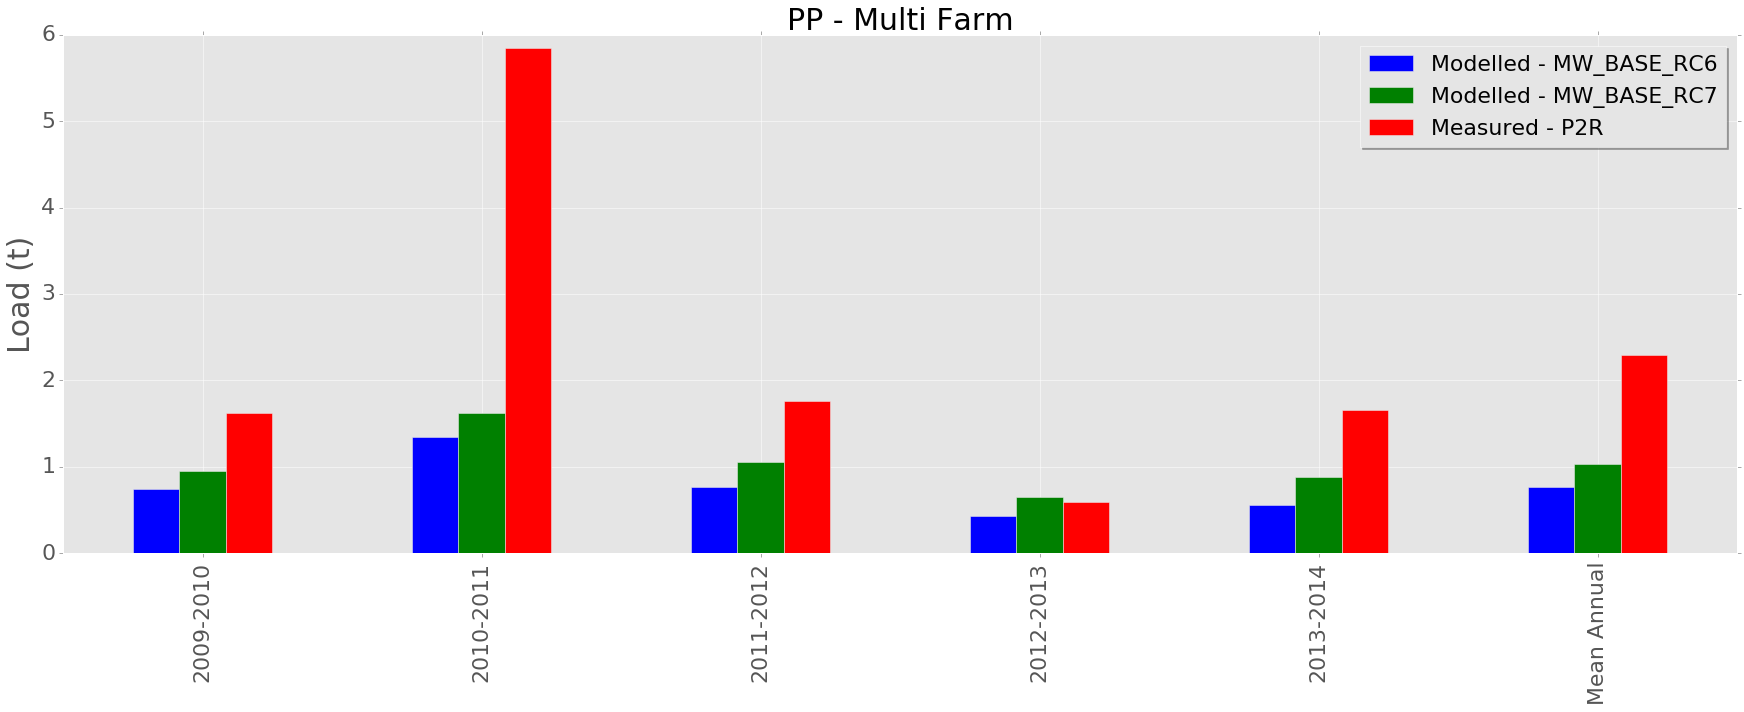

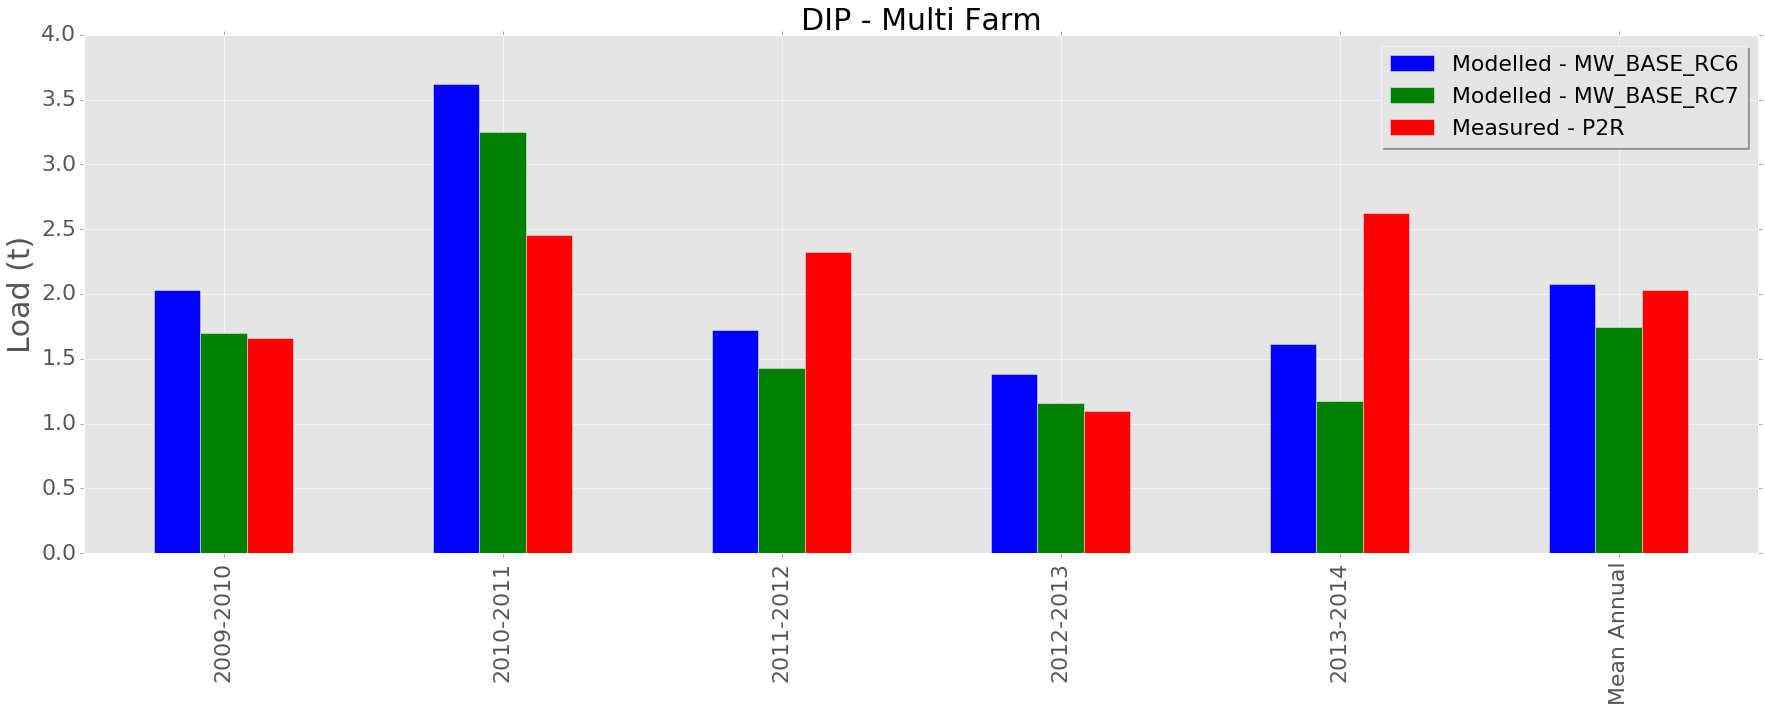

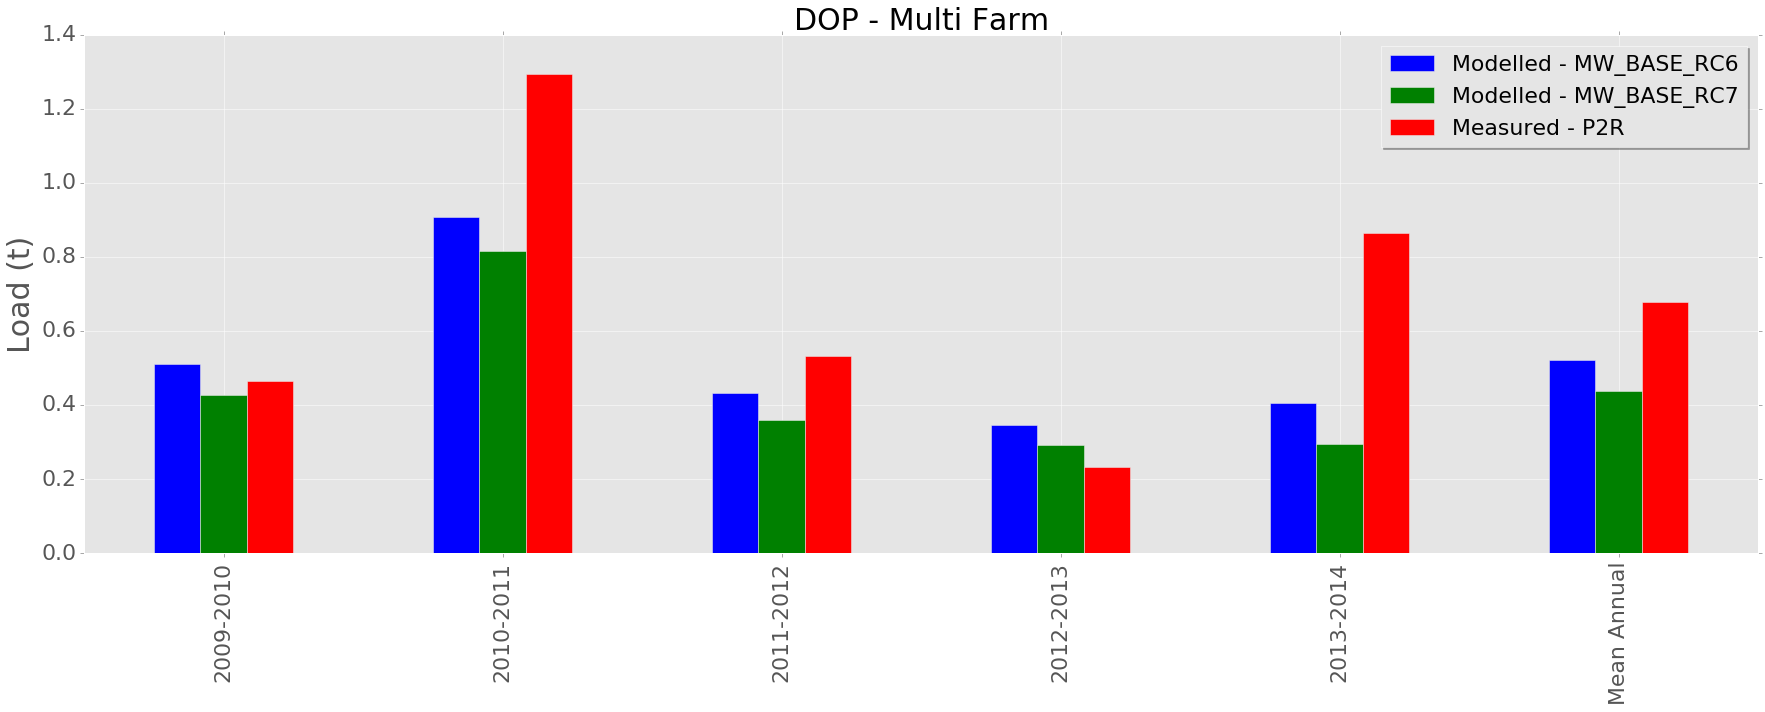

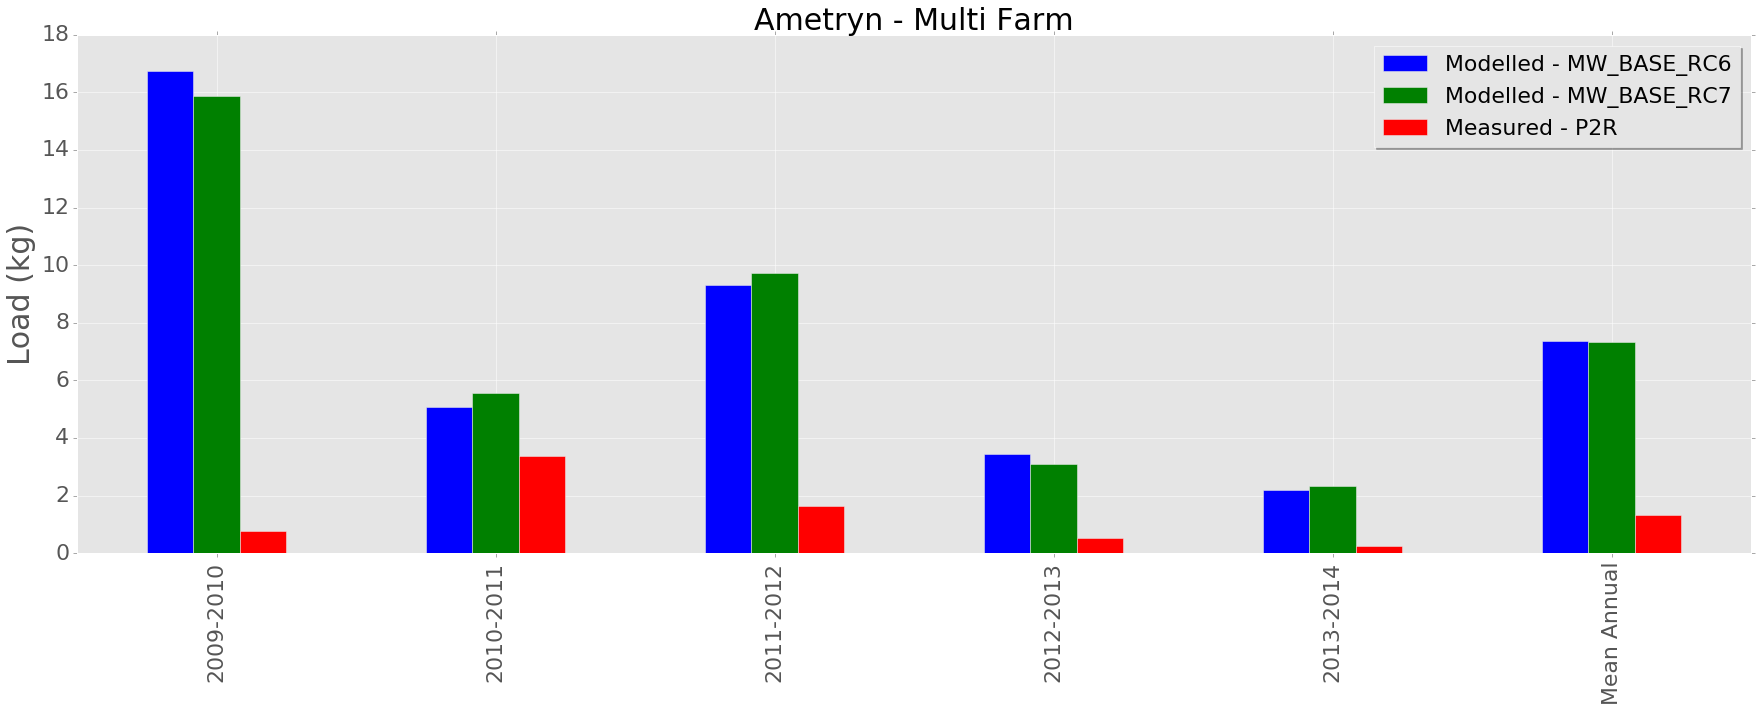

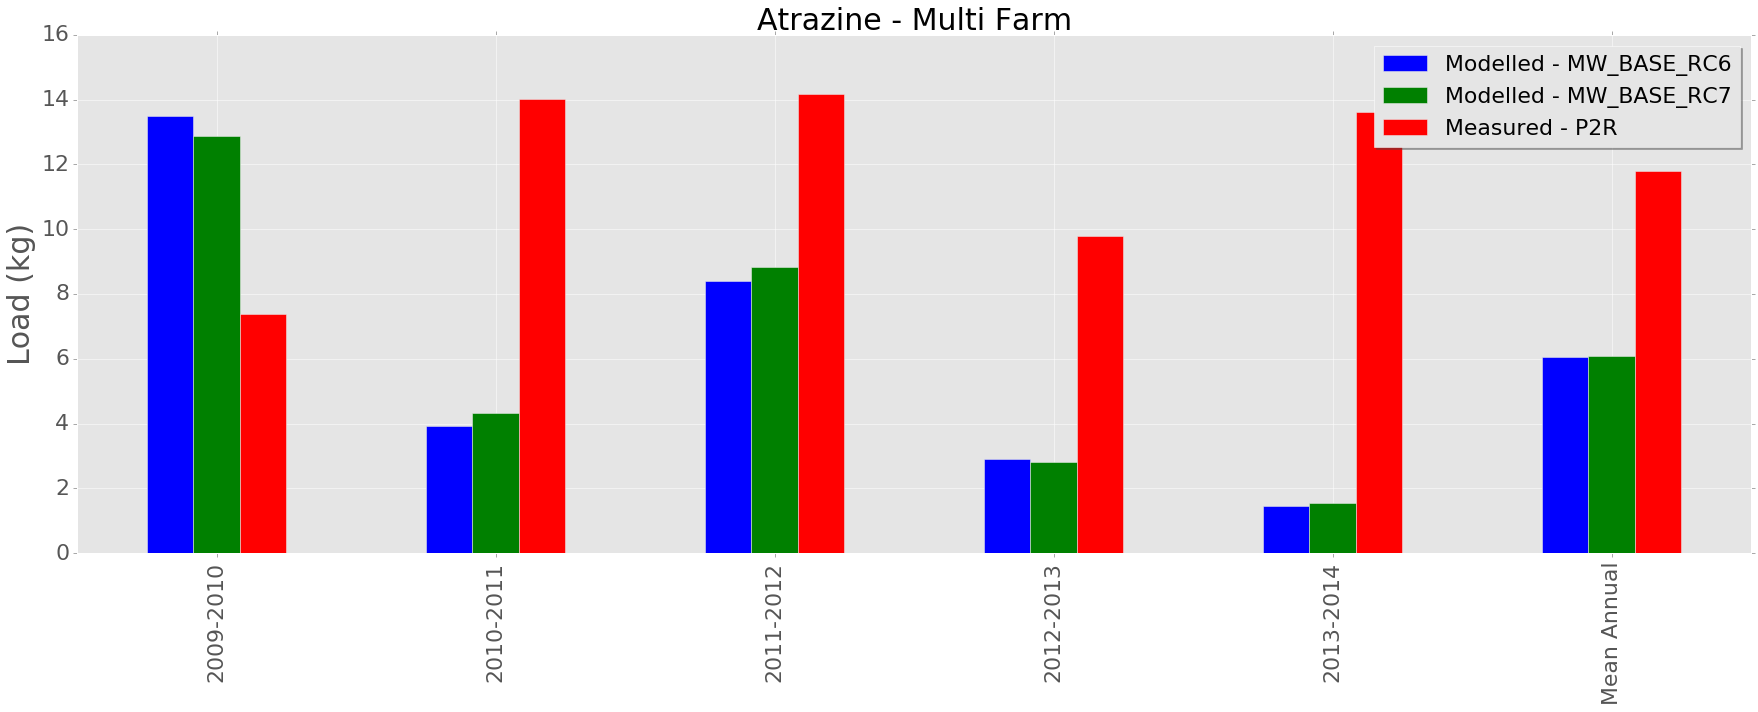

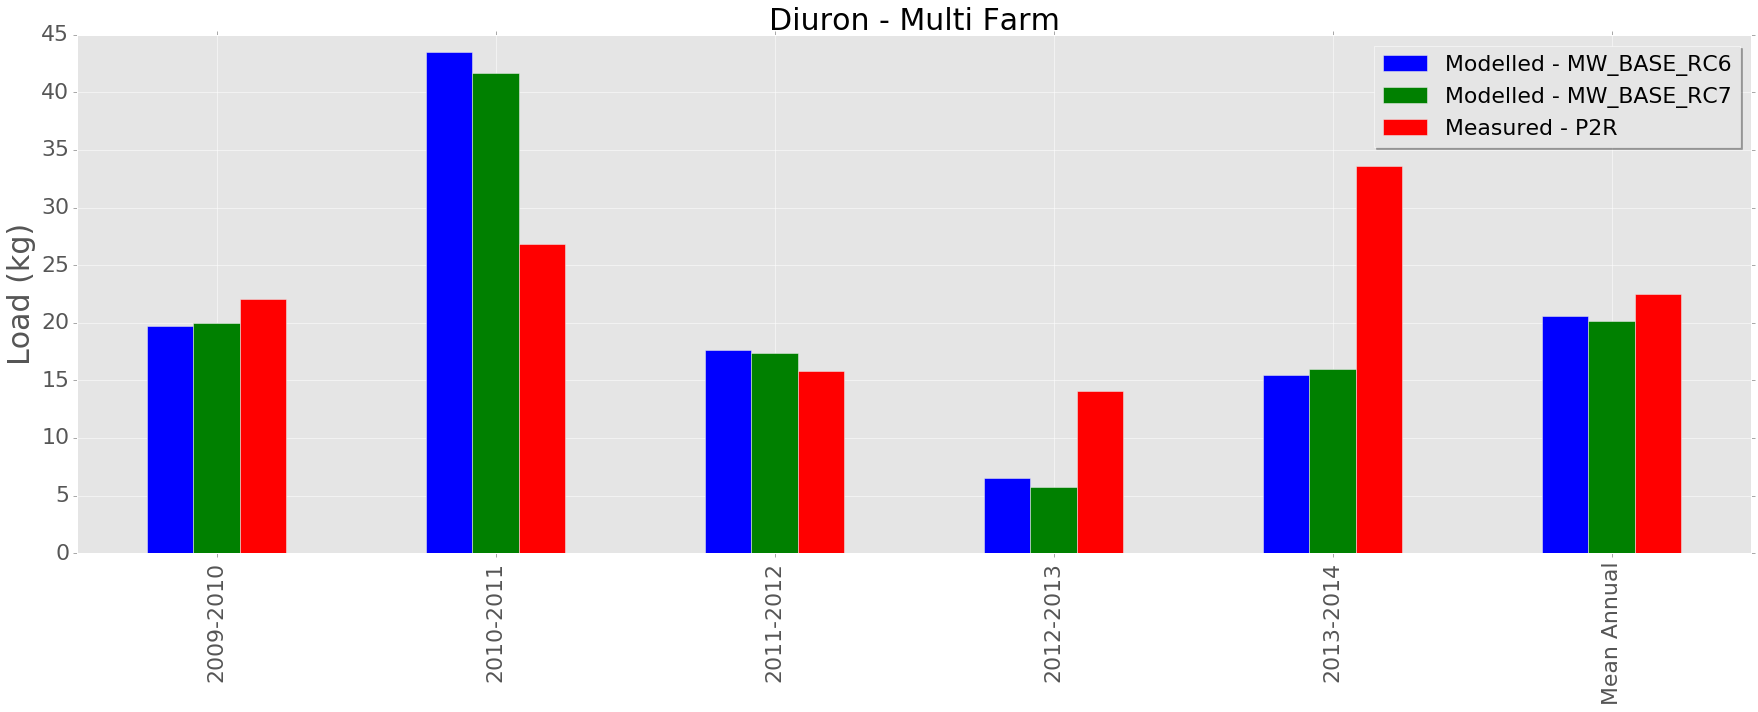

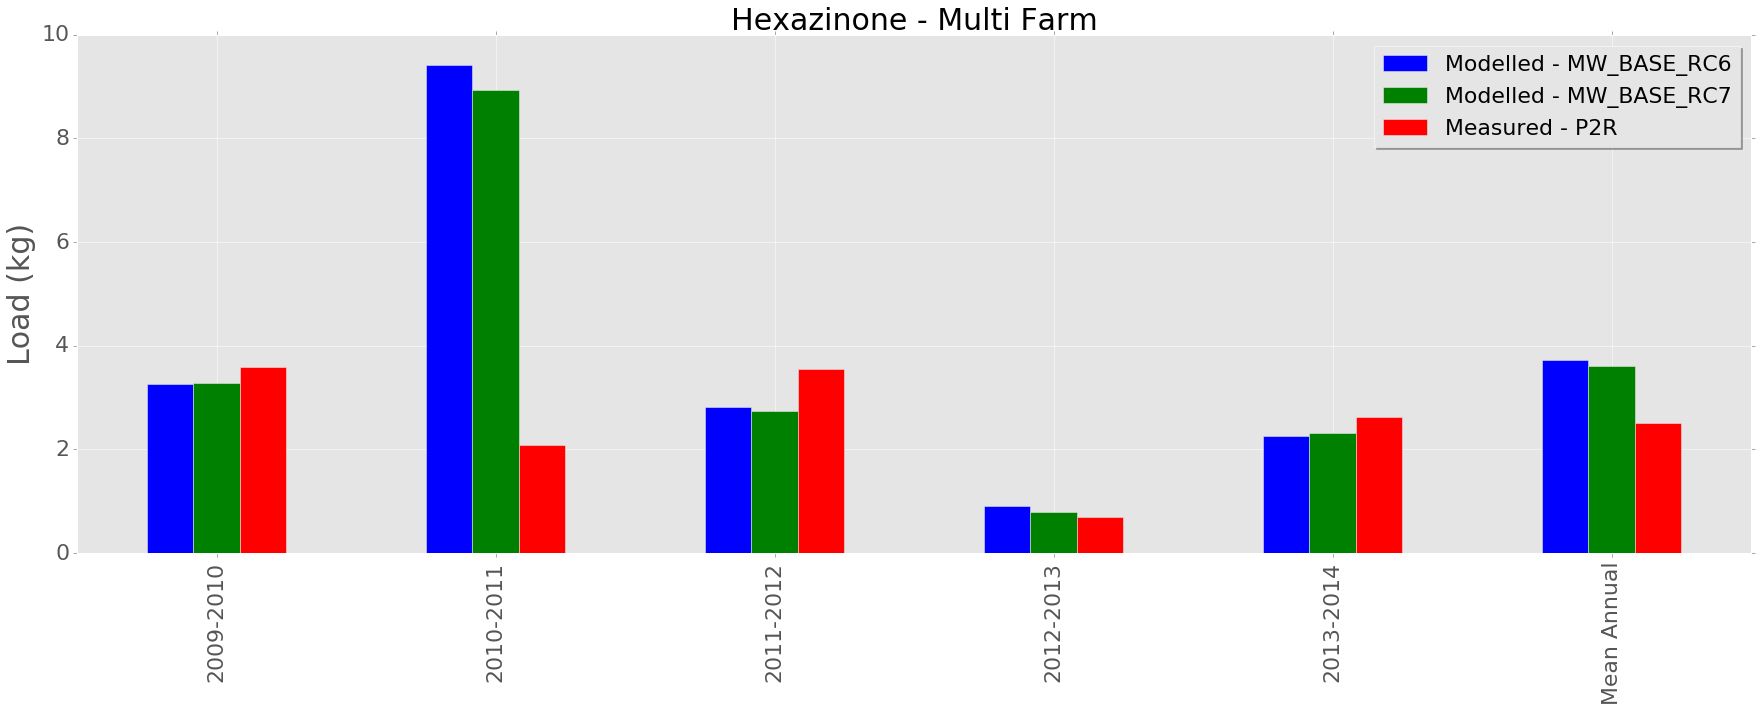

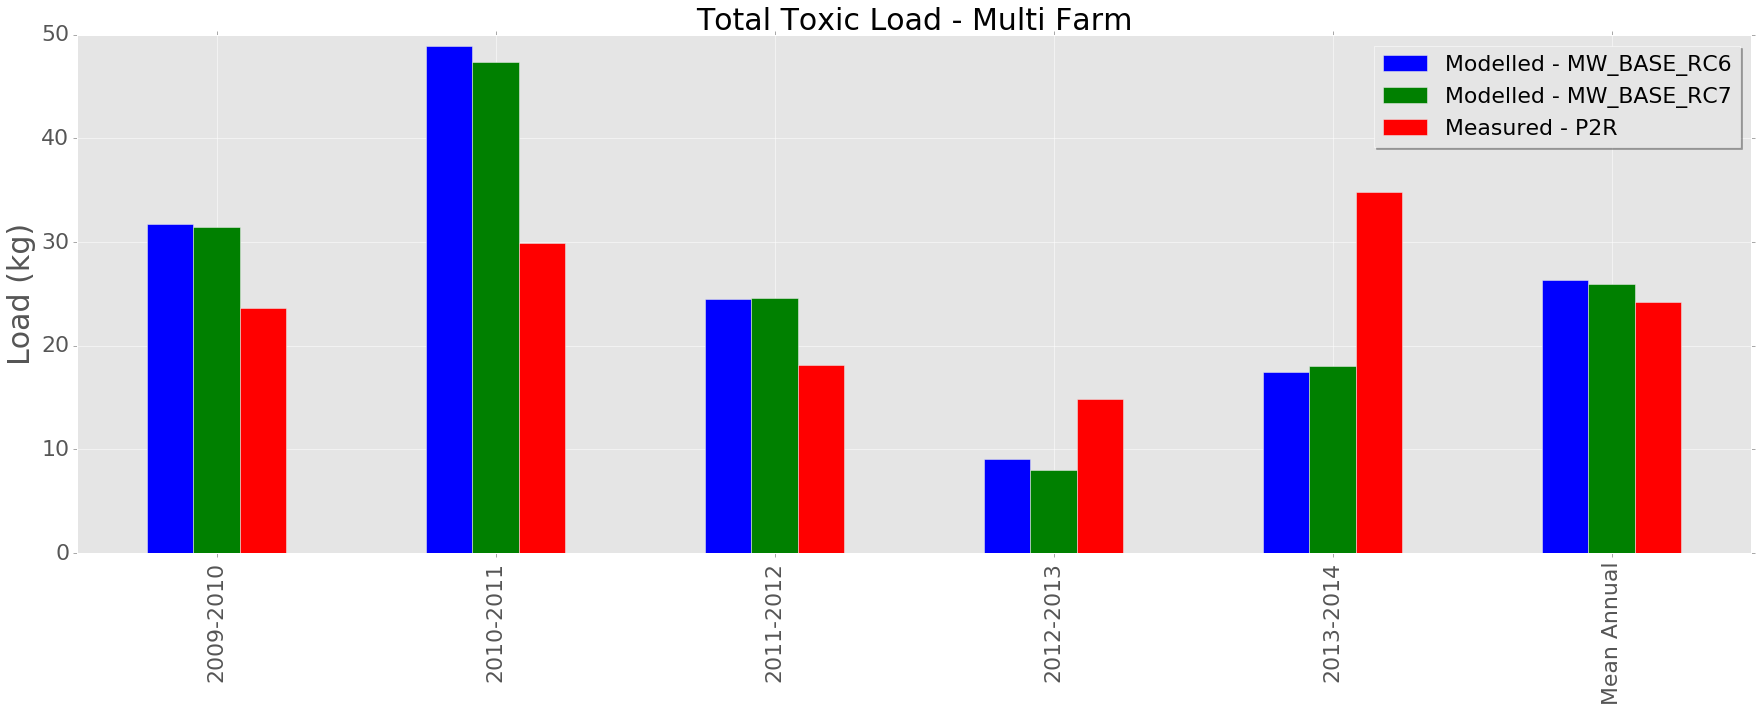

In [146]:
### PLOTTING PLOTTING PLOTTING 

summary = {site: pd.DataFrame() for site in plotSites}

for site in plotSites:
     
    summary_site = {para: pd.DataFrame() for para in plotParas}
    
    title = plotTitles[measurementSites.index(site)] 
    
    modelled_daily_date_2006_2014 = array(modelledDailyModels[modelsOfInterest[0]][site].index)
        
    modelled_daily_previous_flow_2006_2014 = array(modelledDailyModels[modelsOfInterest[0]][site]['Flow'])
    modelled_daily_previous_flow_2006_2014[modelled_daily_previous_flow_2006_2014 == 0] = 0.000001   #replacing 0 with 0.001 as 'error' when dividing by 0

    modelled_daily_latest_flow_2006_2014 = array(modelledDailyModels[modelsOfInterest[1]][site]['Flow'])
    modelled_daily_latest_flow_2006_2014[modelled_daily_latest_flow_2006_2014 == 0] = 0.000001   #replacing 0 with 0.001 as 'error' when dividing by 0
       
    for para in plotParas:
        #print(site + '-' + para)
        
        ### annual bar plots
        
        modelledOne = modelledAnnualModels[modelsOfInterest[0]][site][para] 
        modelledTwo = modelledAnnualModels[modelsOfInterest[1]][site][para]
        
        if site == 'MultiFarm':
            measured = measuredAnnualLoads['MultiFarm_highFlowExclude'][para]
        else:
            measured = measuredAnnualLoads[site][para]
        
        if para == 'Flow':
            compare = array([modelledOne/1000,modelledTwo/1000,measured/1000]).T
        else:
            if para == 'Sediment':
                compare = array([modelledOne/1000,modelledTwo/1000,measured/1000]).T
            else:
                compare = array([modelledOne,modelledTwo,measured]).T
        
        if site == 'MultiFarm':
            columns = ['Modelled - ' + modelsOfInterest[0],'Modelled - ' + modelsOfInterest[1],'Measured - P2R']
        else:
            columns = ['Modelled - ' + modelsOfInterest[0],'Modelled - ' + modelsOfInterest[1],'Measured - GBRCLMP']
            
        index = ['2006-2007','2007-2008','2008-2009','2009-2010','2010-2011','2011-2012','2012-2013','2013-2014']

        d = pd.DataFrame(compare,index=index,columns=columns)
        d_temp = d.T
        d_temp['Mean Annual'] = d.dropna().mean()  
        dd = d_temp.T
        
        sitename = site   #s[sites_measured.index(site)] 
        
        axx = dd.dropna().plot(kind='bar', title= para + ' - ' + title,subplots=0,figsize=(25,10))

        if para == 'Flow':            
            axx.set_ylabel("Flow (GL)",size=30)
        else:
            if para == 'Sediment':
                axx.set_ylabel("Load (kt)",size=30)
            else:
                if para == 'Ametryn' or para == 'Atrazine' or para == 'Diuron' or para == 'Hexazinone' or para == 'Total Toxic Load':
                    axx.set_ylabel("Load (kg)",size=30)
                else: 
                    axx.set_ylabel("Load (t)",size=30)
                
        axx.xaxis.set_tick_params(labelsize=22)
        axx.yaxis.set_tick_params(labelsize=22)
        
        axx.title.set_fontsize(30)
        
        #axx.legend(loc='upper center', bbox_to_anchor=(0.5, 0.97),fancybox=True, shadow=True, ncol=3, fontsize=20)
        axx.legend(fontsize=22,shadow=True)
       
        #mytics=['January\n2008', 'February\n2008', 'March\n2008']
        
        fig = plt.gcf()
        fig.subplots_adjust(bottom=0.225,left=0.06,top=0.945,right=0.99)
        ax = fig.add_subplot(111)
        
        fig.savefig('H:/modelMW/modelValidation/python/plots/' + site + '/' + para + '_' + site + '.png')
        
        summary_site[para] = d.dropna().mean()
        
##### daily plots
        
### collate modelled results    
        modelled_daily_previous_para_2006_2014 = array(modelledDailyModels[modelsOfInterest[0]][site][para])
        modelled_daily_latest_para_2006_2014 = array(modelledDailyModels[modelsOfInterest[1]][site][para])
        
        if para == 'Flow':
           modelled_daily_previous_para_conc_2006_2014 =  modelled_daily_previous_flow_2006_2014*1000
           modelled_daily_latest_para_conc_2006_2014 =  modelled_daily_latest_flow_2006_2014*1000

        else:
           modelled_daily_previous_para_conc_2006_2014 = modelled_daily_previous_para_2006_2014/modelled_daily_previous_flow_2006_2014*1000
           modelled_daily_latest_para_conc_2006_2014 = modelled_daily_latest_para_2006_2014/modelled_daily_latest_flow_2006_2014*1000
            
        modelled_daily_compare_flows = array([modelled_daily_date_2006_2014,
                                        modelled_daily_previous_flow_2006_2014,
                                        modelled_daily_latest_flow_2006_2014]).T     
        
        modelled_daily_compare_concs = array([modelled_daily_date_2006_2014,
                                        modelled_daily_previous_para_conc_2006_2014,
                                        modelled_daily_latest_para_conc_2006_2014]).T
        
        modelled_daily_compare_loads = array([modelled_daily_date_2006_2014,
                                        modelled_daily_previous_para_2006_2014,
                                        modelled_daily_latest_para_2006_2014]).T
    
        
        ### daily flows
        columns_flows = ['Date','modelled_' + modelsOfInterest[0],'modelled_' + modelsOfInterest[1]]
        daily_modelled_flows = pd.DataFrame(modelled_daily_compare_flows,columns=columns_flows)
        daily_modelled_flows = daily_modelled_flows.set_index(['Date'])
        #### to bring the time to the date 
        daily_modelled_flows['d'] = pd.DatetimeIndex(daily_modelled_flows.index).normalize()
        daily_modelled_flows = daily_modelled_flows.set_index(['d'])
        daily_modelled_flows.index.name = None
        
        ### daily concentrations 
        columns_concs = ['Date','modelled_' + modelsOfInterest[0],'modelled_' + modelsOfInterest[1]]
        daily_modelled_concs = pd.DataFrame(modelled_daily_compare_concs,columns=columns_concs)
        daily_modelled_concs = daily_modelled_concs.set_index(['Date'])
        #### to bring the time to the date 
        daily_modelled_concs['d'] = pd.DatetimeIndex(daily_modelled_concs.index).normalize()
        daily_modelled_concs = daily_modelled_concs.set_index(['d'])
        daily_modelled_concs.index.name = None
        #daily_compare.head()
        
        ### daily loads 
        columns_loads = ['Date','modelled_' + modelsOfInterest[0],'modelled_' + modelsOfInterest[1]]
        daily_modelled_loads = pd.DataFrame(modelled_daily_compare_loads,columns=columns_loads)
        daily_modelled_loads = daily_modelled_loads.set_index(['Date'])
        #### to bring the time to the date 
        daily_modelled_loads['d'] = pd.DatetimeIndex(daily_modelled_loads.index).normalize()
        daily_modelled_loads = daily_modelled_loads.set_index(['d'])
        daily_modelled_loads.index.name = None
        
### collate raw concentration measuremets 
        if para == 'Flow':
            if site == 'PioneerRvDumbletonPumpStation':   
                gaugeDNRM = 'PioneerRvDumbletonWeirTW'
            else:
                gaugeDNRM = site
            
            if site == 'MultiFarm':
                daily_measured = qualityDNRMGaugeData[gaugeDNRM]*(3321/2965)   #measured daily flows at MultiFarm get adjusted for area inconsistency.  Annual loads ahve already been adjusted in the input excel. 
            else:
                daily_measured = qualityDNRMGaugeData[gaugeDNRM]  
                
        else:
            
            daily_measured = pd.DataFrame(Mackay_Concentrations[site][para])
            #daily_measured.head()
        
        if para =='Flow':
            daily_all = pd.concat([daily_modelled_flows, daily_measured], axis=1)
        
        else:
            daily_all = pd.concat([daily_modelled_concs, daily_measured], axis=1)
            
        daily_all.columns = ['modelled_' + modelsOfInterest[0],'modelled_' + modelsOfInterest[1],'Measured']
        daily_all
        
        ##### if required to plot flow measurements in the secondondary axis with modelled flow
        #### modelled at Dumbleton Pump Station is compared against measurements recorded at the downstream of the weir
        if site == 'PioneerRvDumbletonPumpStation':   
            gaugeDNRM = 'PioneerRvDumbletonWeirTW'
        else:
            gaugeDNRM = site
        
        daily_flow = pd.concat([qualityDNRMGaugeData[gaugeDNRM],daily_modelled_flows],axis=1)    
         
            
###### PLOTTING TIME SERIES                
#### concentration plots in Primary axis  
        if concTimeSeries == 1:
        
            ax1 = daily_all.plot(style=['k-','g-','ro'],figsize=(20,5),legend=False)
            ax1.legend(loc='upper center', bbox_to_anchor=(0.2, -0.1),fancybox=True, shadow=True, ncol=3)
            ax1.set_xlim([datetime.date(2006, 7, 1), datetime.date(2014, 12, 31)])
            #ax1.set_ylim(0,10)
            
            if para == 'Flow':
                []
            else:
                maxx = daily_measured.quantile(0.9)*4
                minn = daily_measured.min()
                ax1.set_ylim([minn.values,maxx.values])
            
            if para == 'Flow':
                ax1.set_title('Daily ' + para + ' - ' + title)
                ax1.set_ylabel("Flow (ML)")
            else:
                ax1.set_title('Daily ' + para + ' Concnetrtaions - ' + title)
                if para == 'Ametryn' or para == 'Atrazine' or para == 'Diuron' or para == 'Hexazinone':
                    ax1.set_ylabel("Concentration (ug/L)")
                else: 
                    ax1.set_ylabel("Concentration (mg/L)")

                    
### plot flows in the secondary axis - UPSIDE DOWN
        if concFlowSeries == 1:
            
            if para == 'Flow':
                []
            else:
                ax2 = ax1.twiny()
                #ax3 = daily_flow.plot(secondary_y=True, style=['mo','k-','g-',],ax=ax2,legend=False)
                #ax3.legend(loc='upper center', bbox_to_anchor=(0.85, 1.15),fancybox=True, shadow=True, ncol=3)
                ax3 = daily_modelled_flows.plot(secondary_y=True, style=['k-','b-',],ax=ax2,legend=False)
                ax3.set_xticks([])
                ax3.set_xlim([datetime.date(2006, 7, 1), datetime.date(2014, 12, 31)])
                ax3.invert_yaxis()
                ax3.legend(loc='upper center', bbox_to_anchor=(0.85, 1.15),fancybox=True, shadow=True, ncol=2)
                ax3.set_ylabel("Flow (ML/day)")
                
            fig = plt.gcf()
            if para == 'Flow':
                #fig.subplots_adjust(bottom=0.225,left=0.047,top=0.9,right=0.97)
                fig.subplots_adjust(bottom=0.225,left=0.044,top=0.85,right=0.95)
            else:
                fig.subplots_adjust(bottom=0.225,left=0.044,top=0.85,right=0.95)

            ax = fig.add_subplot(111)

            fig.savefig('H:/modelMW/modelValidation/python/plots/' + site + '/' + para + '_concTimeSeries.png')

        
#### plot loads in a different plot 
        if loadTimeSeries == 1:
    
            ax4 = daily_modelled_loads.plot(style=['k-','g-'],figsize=(20,5),legend=False)
            ax4.legend(loc='upper center', bbox_to_anchor=(0.2, -0.07),fancybox=True, shadow=True, ncol=2)
            ax4.set_xlim([datetime.date(2006, 7, 1), datetime.date(2014, 12, 31)])
            ax4.set_title('Daily ' + para + ' Loads - ' + sitename)
            ax4.set_ylabel("Loads (kg/day)")
        
### plot flows in the secondary axis
        if loadFlowSeries == 1:
        
            ax5 = ax4.twiny()
            ax5 = daily_modelled_flows.plot(secondary_y=True, style=['mo','b-'],ax=ax5,legend=False)
            ax5.set_xticks([])
            ax5.set_xlim([datetime.date(2006, 7, 1), datetime.date(2014, 12, 31)])
            ax5.invert_yaxis()  
            ax5.legend(loc='upper center', bbox_to_anchor=(0.8, 1.15),fancybox=True, shadow=True, ncol=3)
            ax5.set_ylabel("Flow (ML/day)")
        
            fig = plt.gcf()
            fig.subplots_adjust(bottom=0.225,left=0.044,top=0.85,right=0.95)
            ax = fig.add_subplot(111)

            fig.savefig('H:/modelMW/modelValidation/python/plots/' + site + '/' + para + '_loadTimeSeries.png')
        

        
    summary[site] = summary_site
      
       

In [147]:
print('Done')

Done


### plotting mean annuals of all parameters in one plot for all sites 

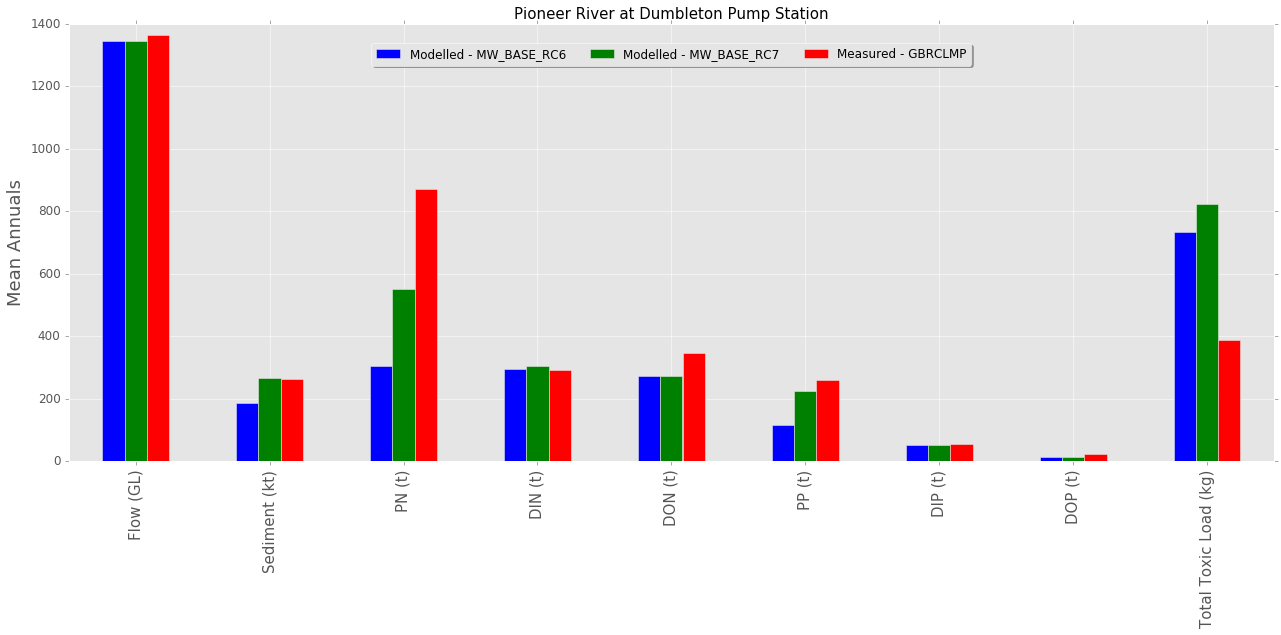

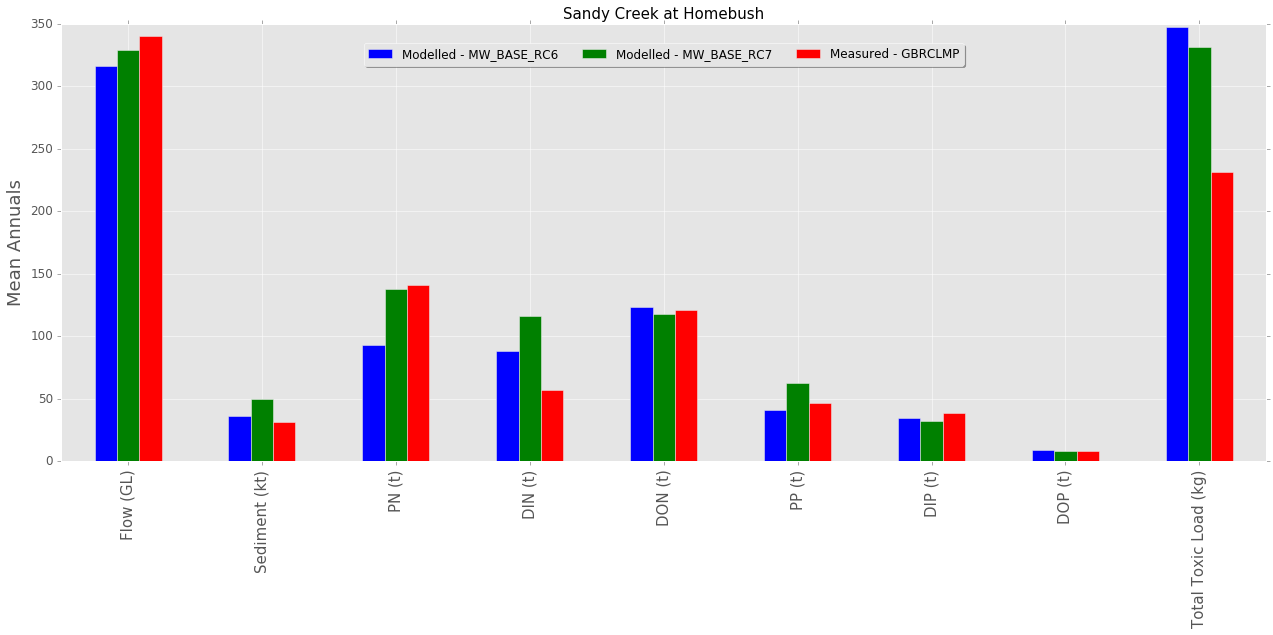

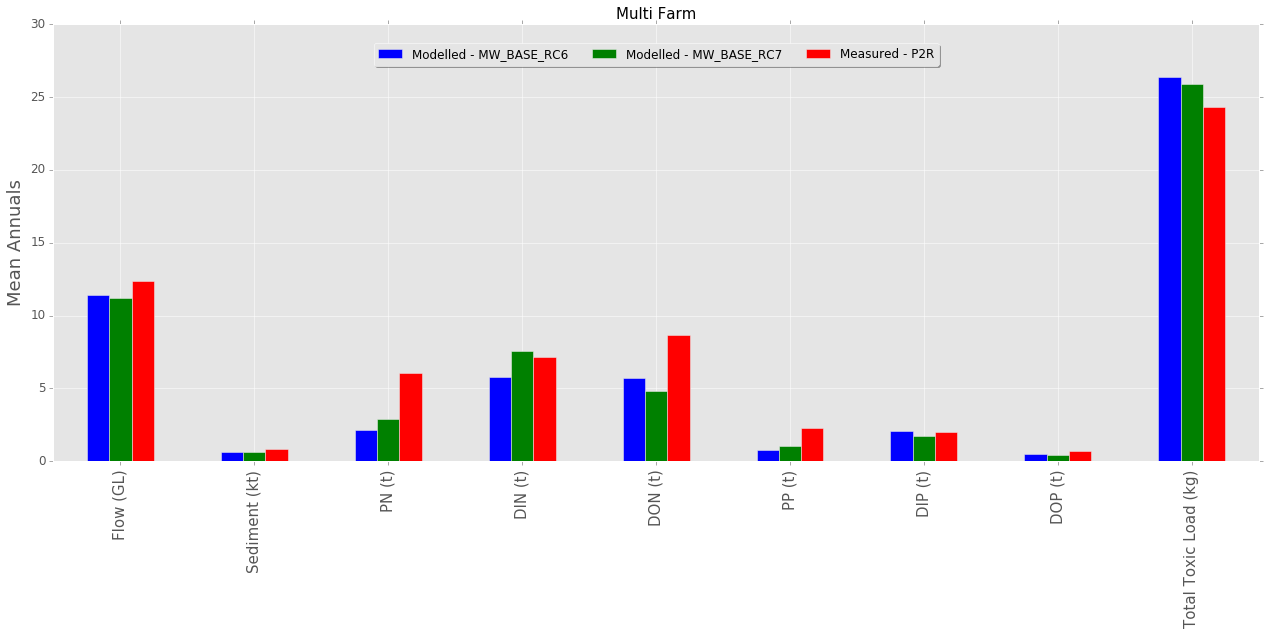

In [148]:
for site in plotSites:
    a = pd.DataFrame(summary[site])
    #a['Total Toxic Load'] = a['Ametryn']*0.65 + a['Atrazine']*0.036 + a['Diuron']*1 + a['Hexazinone']*0.21
    #c = a[['Flow', 'Sediment', 'PN', 'DIN', 'DON', 'PP', 'DIP', 'DOP', 'Ametryn', 'Atrazine', 'Diuron', 'Hexazinone','Total Toxic Load']]
    c = a[['Flow', 'Sediment', 'PN', 'DIN', 'DON', 'PP', 'DIP', 'DOP','Total Toxic Load']]
    #c.columns = ['Flow (GL)', 'Sediment (kt)', 'PN (t)', 'DIN (t)', 'DON (t)', 'PP (t)', 'DIP (t)', 'DOP (t)', 'Ametryn (kg)', 'Atrazine (kg)', 'Diuron (kg)', 'Hexazinone (kg)','Total Toxic Load (kg)']
    c.columns = ['Flow (GL)', 'Sediment (kt)', 'PN (t)', 'DIN (t)', 'DON (t)', 'PP (t)', 'DIP (t)', 'DOP (t)', 'Total Toxic Load (kg)']
    c.T
    axy = c.T.plot(kind='bar',subplots=0,figsize=(18,9))
    axy.set_ylabel("Mean Annuals",size=18)
    #axy.set_xlabel("Pollutants",size=15)
    #axy.set_yticks
    axy.xaxis.set_tick_params(labelsize=15)
    axy.yaxis.set_tick_params(labelsize=12)
    title = plotTitles[measurementSites.index(site)]
    axy.legend(loc='upper center', bbox_to_anchor=(0.5, 0.97),fancybox=True, shadow=True, ncol=3)
    
    axy.set_title(title, size=15)
    
    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.27,left=0.06,top=0.945,right=0.99)
    ax = fig.add_subplot(111)
    
    fig.savefig('H:/modelMW/modelValidation/python/plots/summary/' + site + '.png')

### write results onto XL

In [156]:
import pandas as pd

for model in modelsOfInterest:

    writer = pd.ExcelWriter('modelled_' + model + '.xlsx')

    for site in plotSites:  

        table = pd.DataFrame(modelledAnnualModels[model][site])

        table.to_excel(writer, site)

    writer.save()
    
    


writer = pd.ExcelWriter('measured_' + model + '.xlsx')

for site in plotSites:  
    
    if site == 'MultiFarm':
        table = pd.DataFrame(measuredAnnualLoads['MultiFarm_highFlowExclude'])
    else:
        table = pd.DataFrame(measuredAnnualLoads[site])

    table.to_excel(writer, site)

writer.save()

In [150]:
#std_temp = dd.dropna()
        #std_temp[:-1] = nan
        #std_temp['Modelled - MW_BASE_RC6'][-1:]= nan #dd.dropna().std()['Modelled - MW_BASE_RC6'] 
        #std_temp['Modelled - MW_BASE_RC7'][-1:]= nan #dd.dropna().std()['Modelled - MW_BASE_RC7']
        #std_temp['Measured - GBRCLMP'][-1:]=dd.dropna()[:-1].std()['Measured - GBRCLMP']
        
        #axx = dd.dropna().plot(kind='bar', yerr=std_temp,title= para + ' - ' + title,subplots=0,figsize=(25,10),
        #                      error_kw=dict(ecolor='black', lw=3, capsize=5, capthick=2))